![alt text](https://vignette.wikia.nocookie.net/titanic/images/f/f9/Titanic_side_plan.png/revision/latest?cb=20180322183733)

#1 вариант(80%)

##1.1. Импорт библиотек

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
# from matplotlib import style
import seaborn as sns
import string

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler


from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import confusion_matrix

##1.2. Считывание данных

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

##1.3. Отрисовка выживших vs погибших

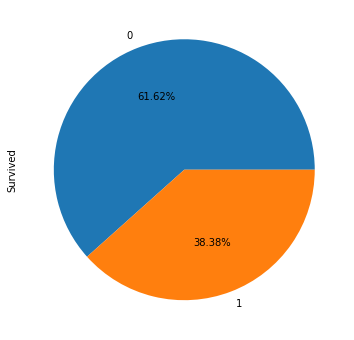

In [3]:
# Соотношение выживших и погибших
fig = plt.figure(figsize=(6,6))
train_df['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')

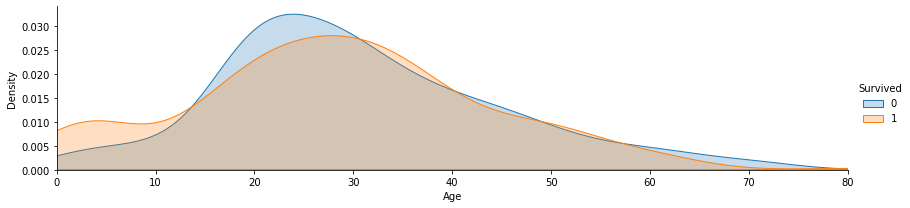

In [4]:
#Отрисовка по возрасту
facet = sns.FacetGrid(train_df,hue='Survived',aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


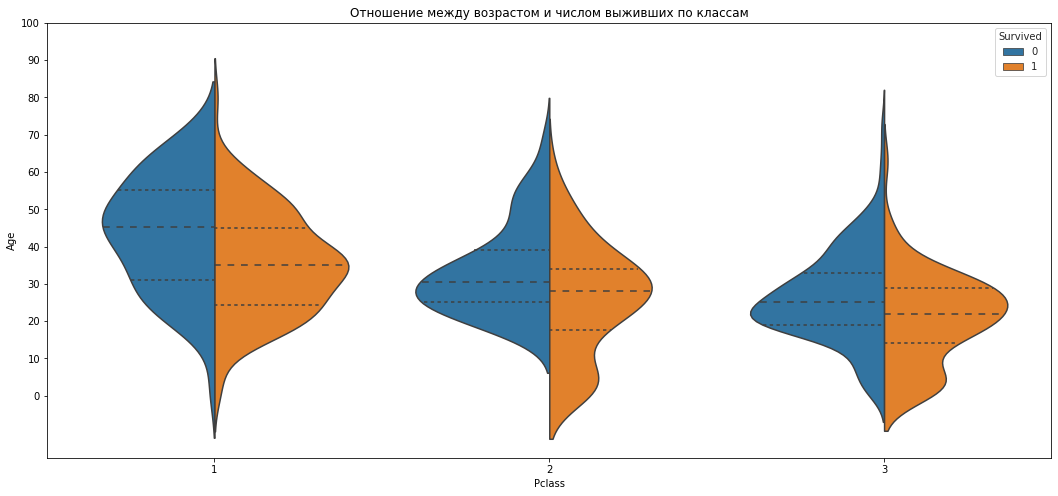

In [5]:
#Отношение между возрастом и числом выживших по классам
fig, ax = plt.subplots(figsize = (18,8))
sns.set_style("whitegrid")
sns.violinplot("Pclass","Age",hue="Survived",data=train_df, split =True, inner="quartile", ax=ax)
ax.set_title('Отношение между возрастом и числом выживших по классам')
ax.set_yticks(range(0,110,10))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


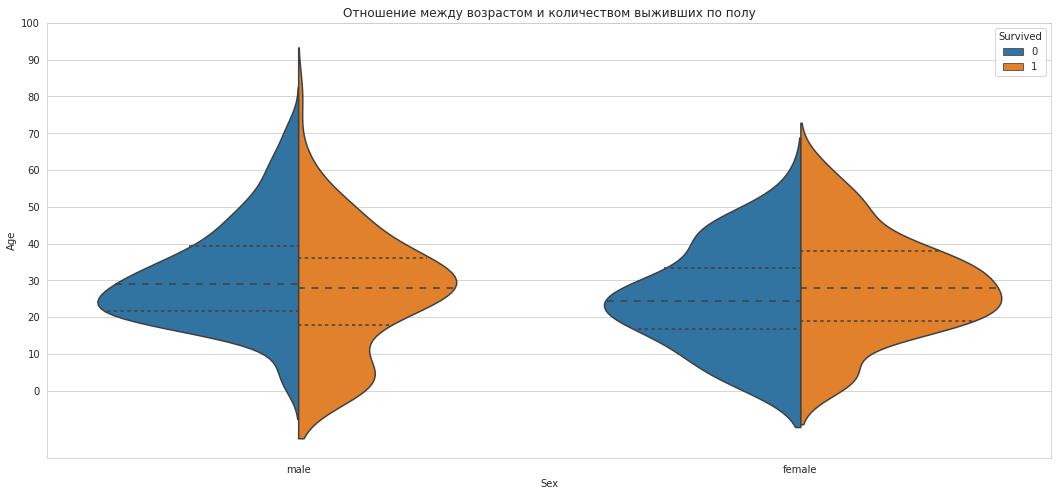

In [6]:
#Отношение между возрастом и количеством выживших по полу
fig, ax = plt.subplots(figsize = (18,8))
sns.set_style("whitegrid")
sns.violinplot("Sex","Age",hue="Survived",data=train_df, split =True, inner="quartile", ax=ax)
ax.set_title('Отношение между возрастом и количеством выживших по полу')
ax.set_yticks(range(0,110,10))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


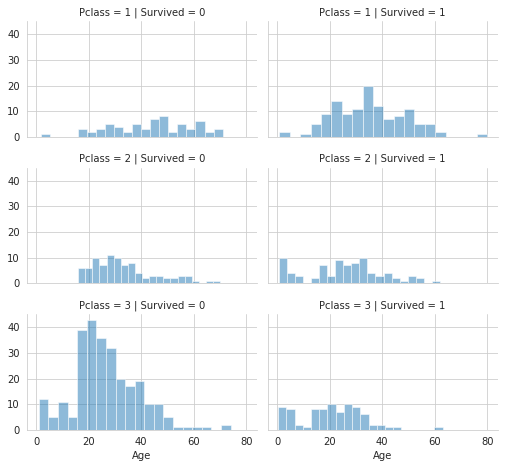

In [7]:
#Распределение выживших и нет по возрасту и классу
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass',size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

##1.4. Объединение набора данных для самостоятельного разделения на обучающую и тестовую выборки

In [8]:
# Объединение набора данных для самостоятельного разделения на обучающую и тестовую выборки
def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

all_data = concat_df(train_df,test_df)

# Разделение набора данных
def divide_df(all_data):
  return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

dfs_list = [train_df,test_df]

##1.5. Анализ набора данных

In [10]:
all_data.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [11]:
train_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [13]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
train_df.describe(include=['O']) #включая данные типа object

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


##1.6. Просмотр и замена пустых значений

In [15]:
def missing_data(data):
  total = data.isnull().sum().sort_values(ascending=False)
  percent = (round(data.isnull().sum()/data.isnull().count()*100,1)).sort_values(ascending=False)  
  missing_df = pd.concat([total,percent], axis=1, keys = ['Всего','% от всего набора'])
  missing_df = missing_df[missing_df['% от всего набора']>0]
  f,ax = plt.subplots(figsize=(8,6))
  plt.xticks(rotation = '90')
  fig=sns.barplot(missing_df.index,missing_df['% от всего набора'], color="blue",alpha=0.8)
  plt.xlabel('Признаки', fontsize=15)
  plt.ylabel('% пропущенных значений', fontsize=15)
  plt.title('Процент пропущенных значений по каждому признаку', fontsize=15)
  return missing_df

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Всего,% от всего набора
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


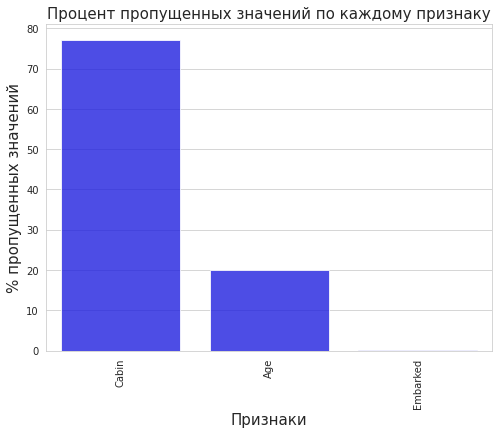

In [16]:
missing_data(train_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Всего,% от всего набора
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2


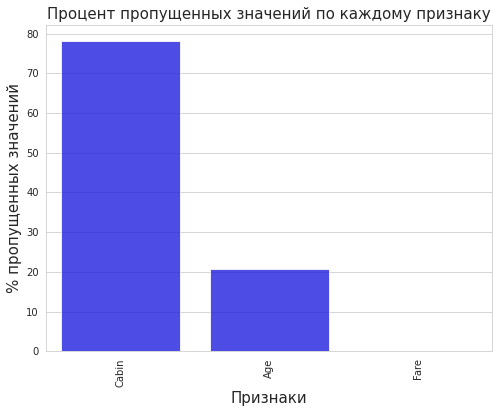

In [17]:
missing_data(test_df)

In [18]:
#Fare
all_data['Fare'].fillna(all_data['Fare'].median(), inplace = True)

#Embarked
all_data['Embarked'].fillna(all_data['Embarked'].mode()[0], inplace = True)

#замена значений для возраста будет проведена ниже

##1.7. Определение корреляции между Pclass и остальными параметрами

In [19]:
all_data_correlation = all_data.corr().abs().unstack().sort_values(ascending=False).reset_index()
all_data_correlation.rename(columns={'level_0':'Feature_1','level_1':'Feature_2',0:'Correlation'},inplace=True)
all_data_correlation[all_data_correlation['Feature_1']=='Pclass']

,Feature_1,Feature_2,Correlation
3,Pclass,Pclass,1.000000
8,Pclass,Fare,0.558683
10,Pclass,Age,0.408106
14,Pclass,Survived,0.338481
31,Pclass,SibSp,0.060832
35,Pclass,PassengerId,0.038354
44,Pclass,Parch,0.018322


##1.8. На основе вышеизложенного анализа можно сказать, что средний возраст пассажиров-женщин ниже чем у мужчин. Следовательно средний возраст связан со значением пола и Pclass.

In [23]:
median_age_by_pclass_sex = all_data.groupby(['Sex','Pclass']).median()['Age']
for pclass in range(1,4):
  for sex in ['female','male']:
    print('Медиана для Pclass {} {}s: {}'.format(pclass,sex,median_age_by_pclass_sex[sex][pclass].astype(int)))

Медиана для Pclass 1 females: 36
Медиана для Pclass 1 males: 42
Медиана для Pclass 2 females: 28
Медиана для Pclass 2 males: 29
Медиана для Pclass 3 females: 22
Медиана для Pclass 3 males: 25


In [24]:
#Замена значений для возраста
all_data['Age'] = all_data.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

##1.9. Добавление новой колонки для кают

In [25]:
all_data['Deck'] = all_data['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'M')

all_data_deck = all_data.groupby(['Deck','Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 
                                                                        'Ticket']).rename(columns={'Name': 'Count'})
all_data_deck

Count
Deck Pclass       
A    1          22
B    1          65
C    1          94
D    1          40
     2           6
E    1          34
     2           4
     3           3
F    2          13
     3           8
G    3           5
M    1          67
     2         254
     3         693
T    1           1

In [26]:
# Поскольку пассажир в каюте T только 1, то его следует переместить, допустим в каюту A
idx = all_data[all_data['Deck'] == 'T'].index
all_data.loc[idx, 'Deck'] = 'A'

In [27]:
# Количество человек в каждой каюте
all_data['Deck'] = all_data['Deck'].replace(['A','B','C'],'ABC')
all_data['Deck'] = all_data['Deck'].replace(['D','E'],'DE')
all_data['Deck'] = all_data['Deck'].replace(['F','G'],'FG')

all_data['Deck'].value_counts()

M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

In [28]:
# Колонка с каютами является неиформативной, поэтому ее можно убрать
all_data.drop(['Cabin'], inplace =True, axis = 1)

train_df , test_df = divide_df(all_data)
dfs_list = [train_df,test_df]

#просмотр пустых значений в train и test
for df in dfs_list:
  print(train_df.isnull().sum())
  print('-'*30)

Age            0
Embarked       0
Fare           0
Name           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
Deck           0
dtype: int64
------------------------------
Age            0
Embarked       0
Fare           0
Name           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
Deck           0
dtype: int64
------------------------------


##1.10. Распределение количества человек по отдельным характеристикам

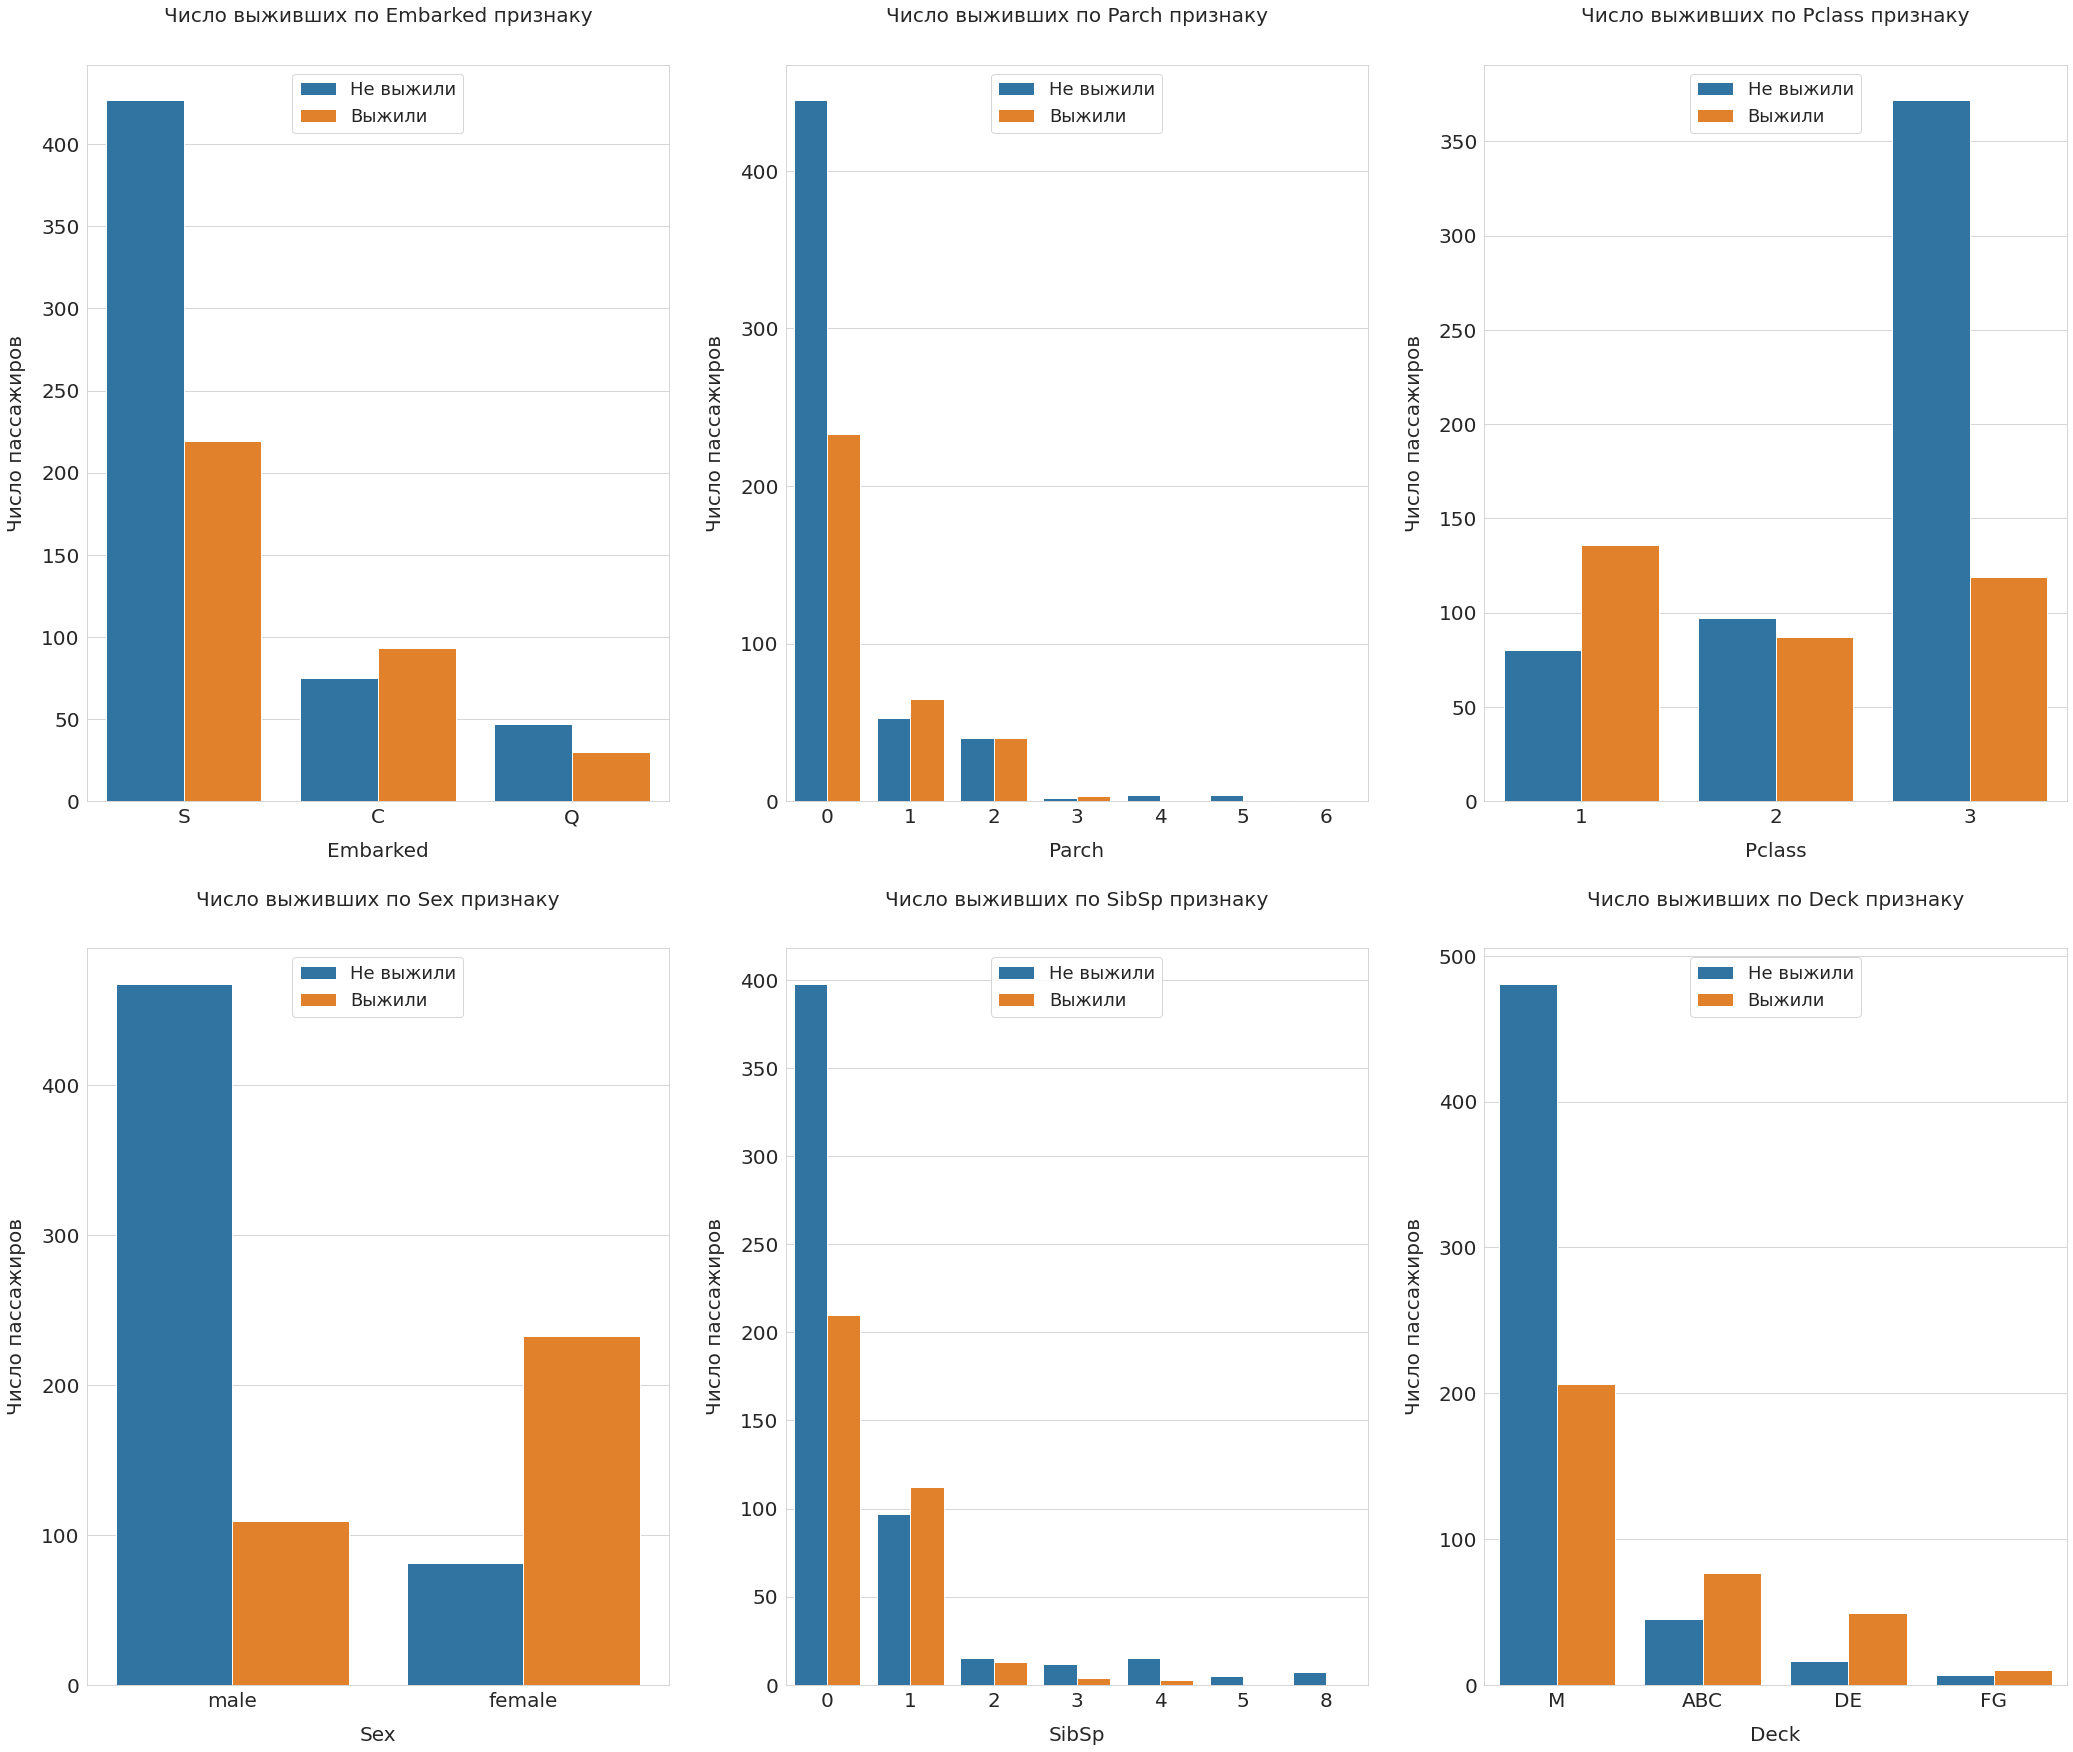

In [29]:
cate_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Deck']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cate_features, 1):    
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=train_df)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Число пассажиров', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Не выжили', 'Выжили'], loc='upper center', prop={'size': 18})
    plt.title('Число выживших по {} признаку'.format(feature), size=20, y=1.05)

plt.show()

In [30]:
#объединение наборов данных
all_data = concat_df(train_df,test_df)
all_data.head()

,Age,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,M,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,ABC,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,M,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,ABC,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,M,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


##1.11. Корреляция между всеми признаками

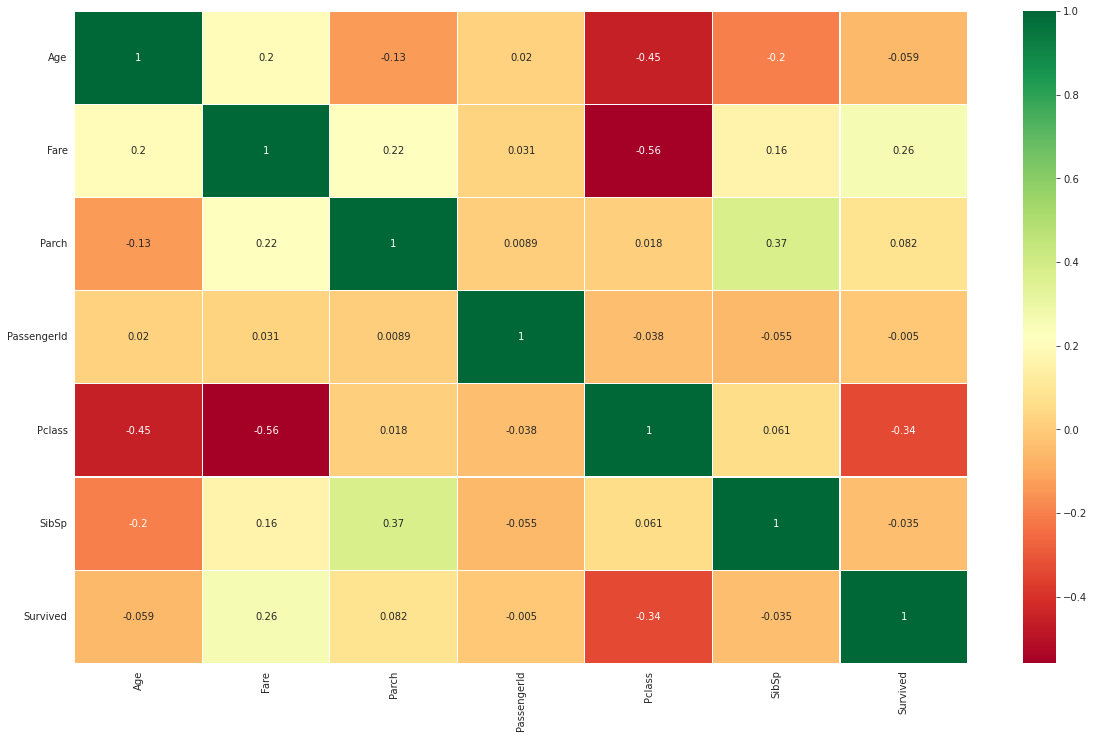

In [31]:
sns.heatmap(all_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [32]:
all_data['Ticket_Frequency'] = all_data.groupby('Ticket')['Ticket'].transform('count')

##1.12. Размер семьи после группировки

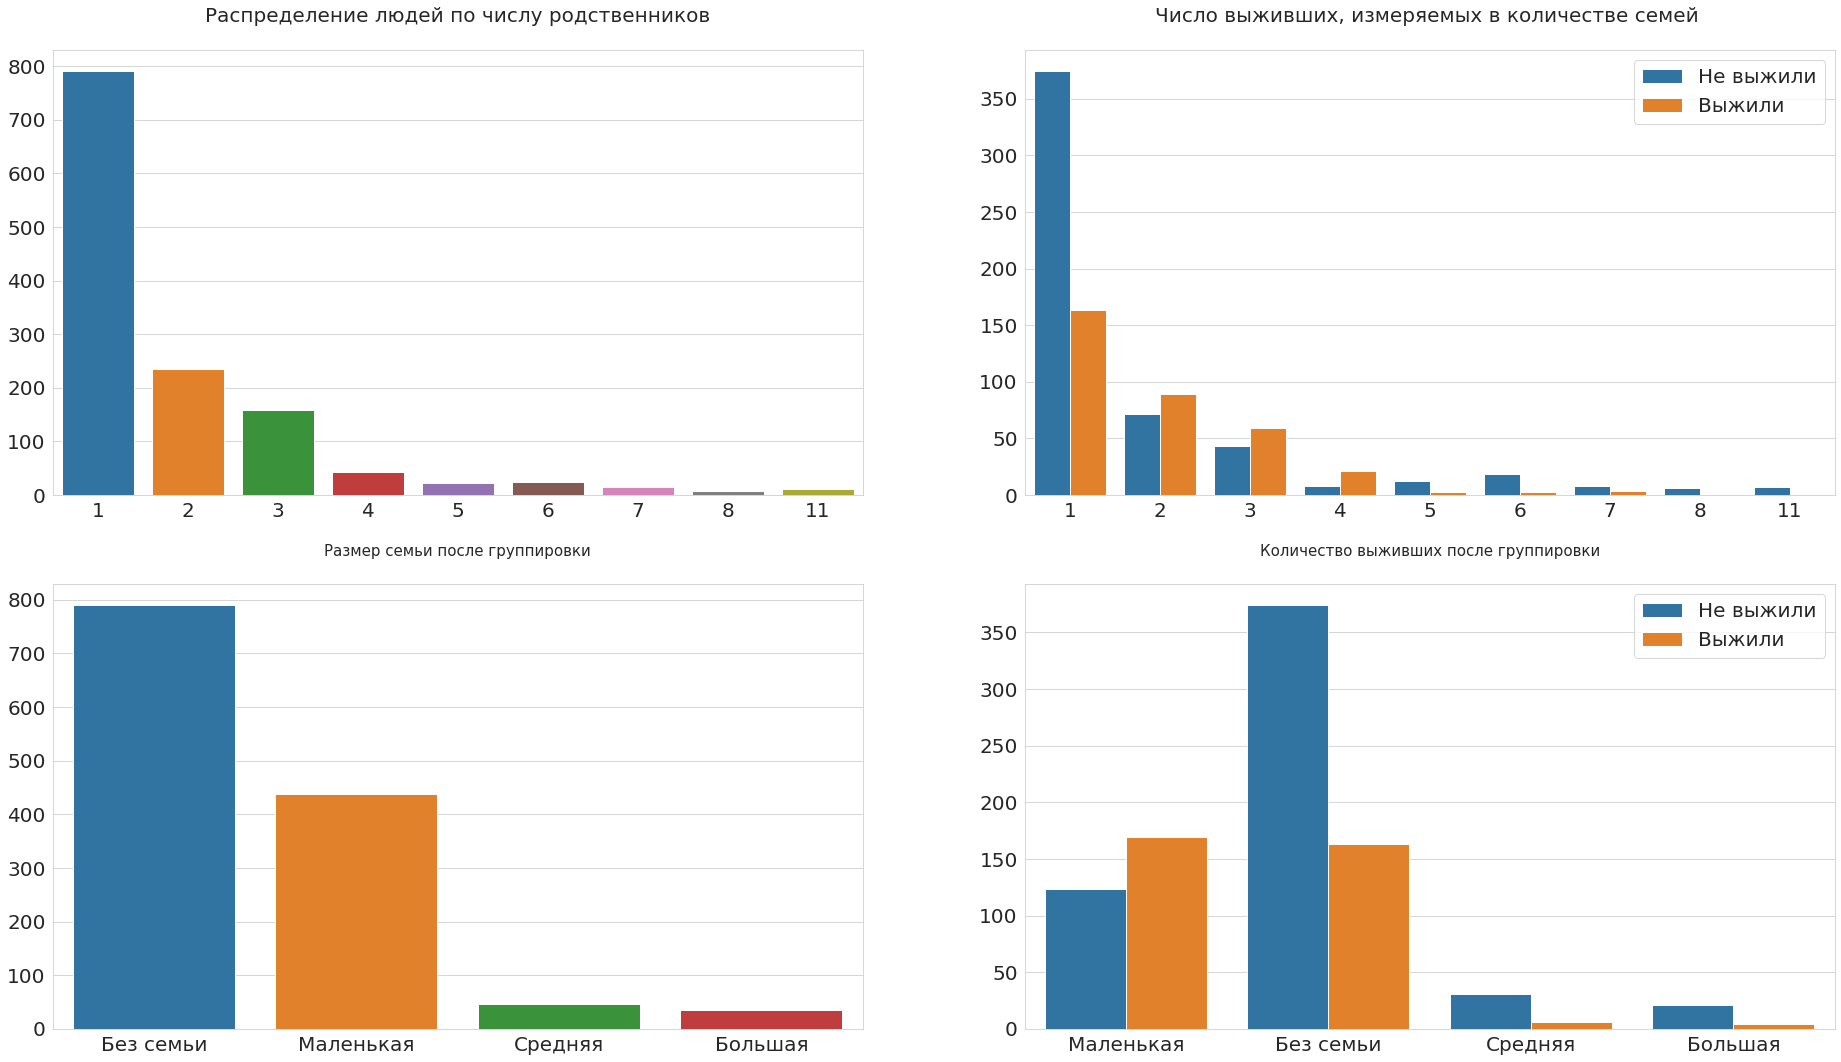

In [42]:
all_data['Family_Size'] = all_data['SibSp'] + all_data['Parch'] + 1

fig, axs = plt.subplots(figsize=(18, 18), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=all_data['Family_Size'].value_counts().index, y=all_data['Family_Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Survived', data=all_data, ax=axs[0][1])
axs[0][0].set_title('Распределение людей по числу родственников', size=20, y=1.05)
axs[0][1].set_title('Число выживших по семьям ', size=20, y=1.05)

family_view = {1: 'Без семьи', 2: 'Маленькая', 3: 'Маленькая', 4: 'Маленькая', 5: 'Средняя', 6: 'Средняя', 7: 'Большая', 8: 'Большая', 11: 'Большая'}
all_data['Family_Size_Grouped'] = all_data['Family_Size'].map(family_view)

sns.barplot(x=all_data['Family_Size_Grouped'].value_counts().index, y=all_data['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=all_data, ax=axs[1][1])

axs[1][0].set_title('Размер семьи после группировки', size=15, y=1.05)
axs[1][1].set_title('Количество выживших после группировки', size=15, y=1.05)
for i in range(2):
    axs[i][1].legend(['Не выжили', 'Выжили'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')
plt.show()

In [47]:
# Создание колонки женат/замужем или нет
all_data['Title'] = all_data['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

all_data['Is_Married'] = 0
all_data['Is_Married'].loc[all_data['Title'] == 'Mrs'] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


##1.13. Распределение людей по роли

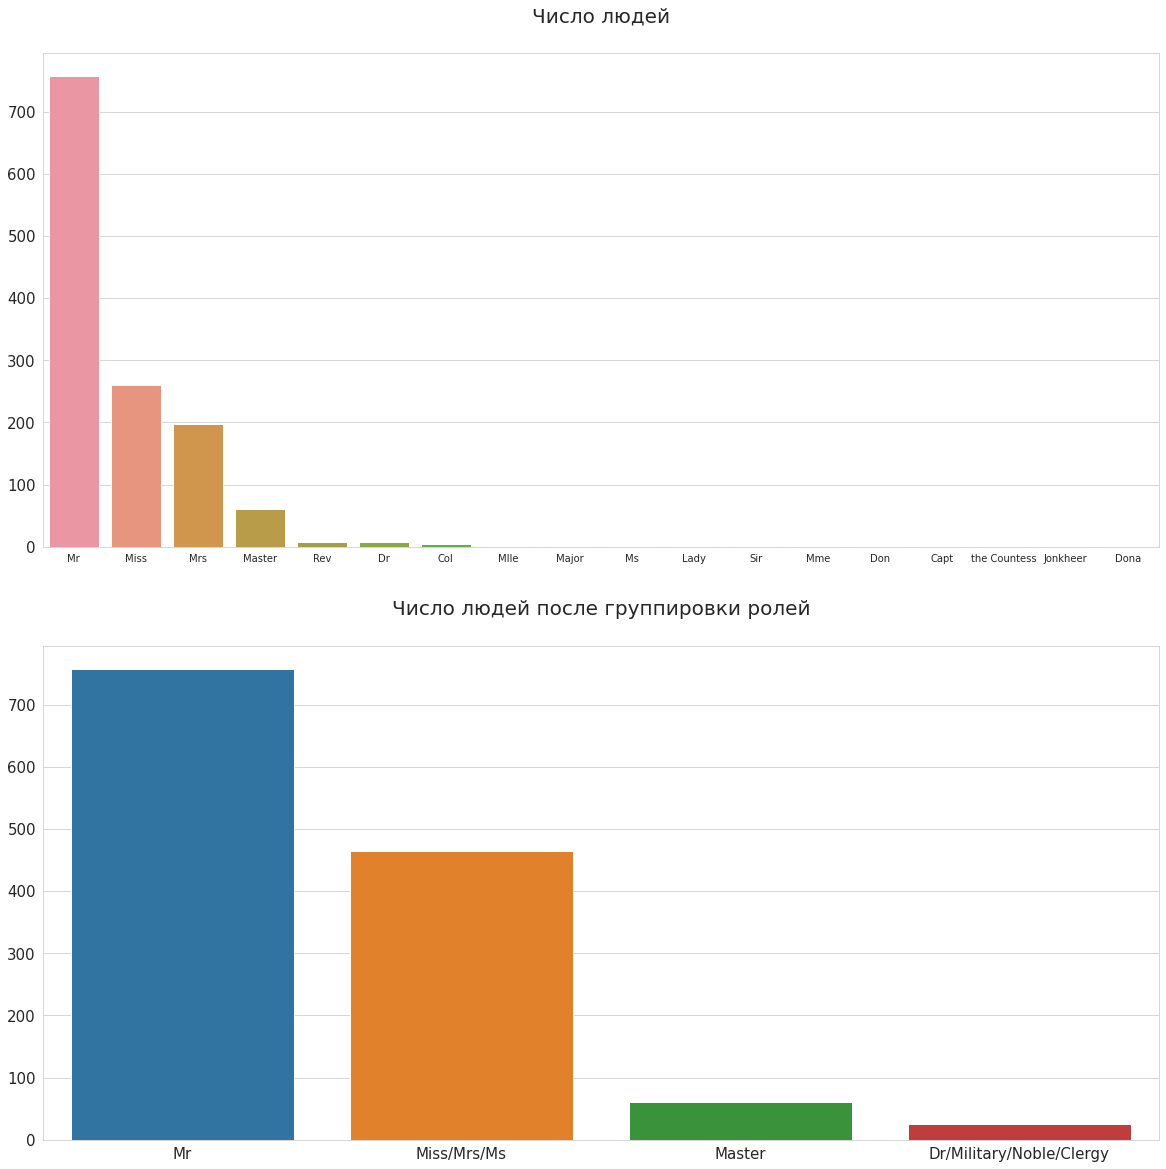

In [48]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))
sns.barplot(x=all_data['Title'].value_counts().index, y=all_data['Title'].value_counts().values, ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):    
    axs[i].tick_params(axis='y', labelsize=15)

axs[0].set_title('Число людей', size=20, y=1.05)

all_data['Title'] = all_data['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
all_data['Title'] = all_data['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=all_data['Title'].value_counts().index, y=all_data['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Число людей после группировки ролей', size=20, y=1.05)

plt.show()

In [49]:
# функция для получения фамилии пассажира и создания колонки с фамилией
def extract_surname(data):    
    
    families = []
    
    for i in range(len(data)):  
        name = data.iloc[i]

        if '(' in name:
            name_no_bracket = name.split('(')[0] 
        else:
            name_no_bracket = name
            
        family = name_no_bracket.split(',')[0]
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]
        
        for c in string.punctuation:
            family = family.replace(c, '').strip()
            
        families.append(family)
            
    return families

all_data['Family'] = extract_surname(all_data['Name'])

In [50]:
train_df , test_df = divide_df(all_data)
dfs_list = [train_df,test_df]

##1.14. Коэффициент выживаемости семей

In [51]:
# Коэффициент выживаемости семьи
non_unique_families = [x for x in train_df['Family'].unique() if x in test_df['Family'].unique()]
non_unique_tickets = [x for x in train_df['Ticket'].unique() if x in test_df['Ticket'].unique()]

df_family_survival_rate = train_df.groupby('Family')['Survived', 'Family','Family_Size'].median()
df_ticket_survival_rate = train_df.groupby('Ticket')['Survived', 'Ticket','Ticket_Frequency'].median()

family_rates = {}
ticket_rates = {}

for i in range(len(df_family_survival_rate)):
    if df_family_survival_rate.index[i] in non_unique_families and df_family_survival_rate.iloc[i, 1] > 1:
        family_rates[df_family_survival_rate.index[i]] = df_family_survival_rate.iloc[i, 0]

for i in range(len(df_ticket_survival_rate)):
    if df_ticket_survival_rate.index[i] in non_unique_tickets and df_ticket_survival_rate.iloc[i, 1] > 1:
        ticket_rates[df_ticket_survival_rate.index[i]] = df_ticket_survival_rate.iloc[i, 0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


##1.15. Создание списка семей и билетов, которые встречаются как в обучающем, так и в тестовой выборке, затем проверка семьи, которая существует как в обучающем, так и в тестовом множестве, и имеет членов более 1, после чего сопоставление билетов у тех, кто имел более одного билета.

In [52]:
mean_survival_rate = np.mean( train_df['Survived'])

train_family_survival_rate = []
train_family_survival_rate_NA = []
test_family_survival_rate = []
test_family_survival_rate_NA = []

for i in range(len( train_df)):
    if  train_df['Family'][i] in family_rates:
        train_family_survival_rate.append(family_rates[ train_df['Family'][i]])
        train_family_survival_rate_NA.append(1)
    else:
        train_family_survival_rate.append(mean_survival_rate)
        train_family_survival_rate_NA.append(0)
        
for i in range(len(test_df)):
    if test_df['Family'].iloc[i] in family_rates:
        test_family_survival_rate.append(family_rates[test_df['Family'].iloc[i]])
        test_family_survival_rate_NA.append(1)
    else:
        test_family_survival_rate.append(mean_survival_rate)
        test_family_survival_rate_NA.append(0)
        
train_df['Family_Survival_Rate'] = train_family_survival_rate
train_df['Family_Survival_Rate_NA'] = train_family_survival_rate_NA
test_df['Family_Survival_Rate'] = test_family_survival_rate
test_df['Family_Survival_Rate_NA'] = test_family_survival_rate_NA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [53]:
train_ticket_survival_rate = []
train_ticket_survival_rate_NA = []
test_ticket_survival_rate = []
test_ticket_survival_rate_NA = []

for i in range(len(train_df)):
    if train_df['Ticket'][i] in ticket_rates:
        train_ticket_survival_rate.append(ticket_rates[train_df['Ticket'][i]])
        train_ticket_survival_rate_NA.append(1)
    else:
        train_ticket_survival_rate.append(mean_survival_rate)
        train_ticket_survival_rate_NA.append(0)
        
for i in range(len(test_df)):
    if test_df['Ticket'].iloc[i] in ticket_rates:
        test_ticket_survival_rate.append(ticket_rates[test_df['Ticket'].iloc[i]])
        test_ticket_survival_rate_NA.append(1)
    else:
        test_ticket_survival_rate.append(mean_survival_rate)
        test_ticket_survival_rate_NA.append(0)
        
train_df['Ticket_Survival_Rate'] = train_ticket_survival_rate
train_df['Ticket_Survival_Rate_NA'] = train_ticket_survival_rate_NA
test_df['Ticket_Survival_Rate'] = test_ticket_survival_rate
test_df['Ticket_Survival_Rate_NA'] = test_ticket_survival_rate_NA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [54]:
# Коэффициент выживаемости для категории билетов и коэффициент выживаемости семей
for df in dfs_list:
    df['Survival_Rate'] = (df['Ticket_Survival_Rate'] + df['Family_Survival_Rate']) / 2
    df['Survival_Rate_NA'] = (df['Ticket_Survival_Rate_NA'] + df['Family_Survival_Rate_NA']) / 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


##1.16. Изменение признаков

###1.16.1 Кодирование признаков

In [56]:
non_numeric_features = ['Embarked', 'Sex', 'Deck', 'Title', 'Family_Size_Grouped', 'Age', 'Fare']

for df in dfs_list:
    for feature in non_numeric_features:        
        df[feature] = LabelEncoder().fit_transform(df[feature])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [57]:
onehoten_features = ['Sex','Pclass',  'Deck', 'Embarked', 'Family_Size_Grouped', 'Title']
encoded_features = []

for df in dfs_list:
    for feature in onehoten_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)       
train_df = pd.concat([train_df, *encoded_features[:6]], axis=1)
test_df = pd.concat([test_df, *encoded_features[6:]], axis=1)

###1.16.2 Удаление ненужных колонок

In [58]:
all_data = concat_df(train_df, test_df )
drop_cols = ['Deck', 'Embarked', 'Family', 'Family_Size', 'Family_Size_Grouped', 'Survived',
             'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Ticket', 'Title',
            'Ticket_Survival_Rate', 'Family_Survival_Rate', 'Ticket_Survival_Rate_NA', 'Family_Survival_Rate_NA']
all_data.drop(columns=drop_cols, inplace=True)

In [59]:
test_drop_cols = ['Deck', 'Embarked', 'Family', 'Family_Size', 'Family_Size_Grouped',
             'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Ticket', 'Title',
            'Ticket_Survival_Rate', 'Family_Survival_Rate', 'Ticket_Survival_Rate_NA', 'Family_Survival_Rate_NA']

###1.16.3 Корреляция между признаками

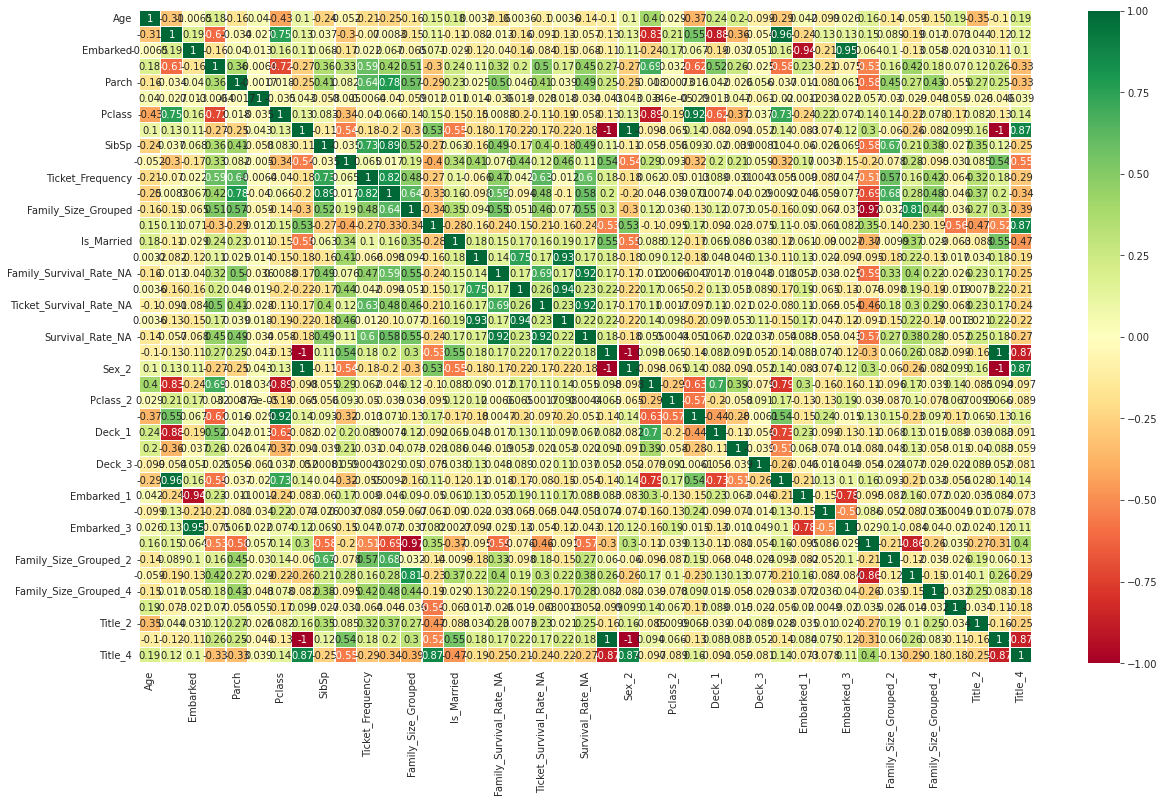

In [60]:
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [61]:
X = train_df.drop(columns=drop_cols)

##1.17. Построение моделей

In [62]:
# Нормализация данных
all_features = StandardScaler().fit_transform(X)
Targeted_feature= train_df['Survived'].values
test_X = StandardScaler().fit_transform(test_df.drop(columns=test_drop_cols))

print('X_train shape: {}'.format(all_features.shape))
print('Y_train shape: {}'.format(Targeted_feature.shape))
print('X_test shape: {}'.format(test_X.shape))

X_train shape: (891, 26)
Y_train shape: (891,)
X_test shape: (418, 26)


In [63]:
X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 26), (268, 26), (623,), (268,))

In [64]:
# оценка качества модели
def model_accuracy(model,all_feature,Targeted_feature):
  X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42,shuffle=True)
  
  print('Качество модели составляет',round(model.score(X_train, y_train)*100,2), "%")

  kfold = KFold(n_splits=10, random_state=22, shuffle=True)
  cross_scores=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
  print('Перекрестная проверка [Mean] :',round(cross_scores.mean()*100,2),'%')
  print('Перекрестная проверка [Scores] :',cross_scores)
  print('Перекрестная проверка [Standard Deviation] :',cross_scores.std())

  y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
  sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
  plt.title('Конфьюзионная матрица', y=1.05, size=15)

--------------Качество модели "Случайный лес"----------------------------
Качество модели составляет 98.39 %
Перекрестная проверка [Mean] : 84.18 %
Перекрестная проверка [Scores] : [0.83333333 0.85393258 0.79775281 0.84269663 0.83146067 0.88764045
 0.85393258 0.76404494 0.88764045 0.86516854]
Перекрестная проверка [Standard Deviation] : 0.03634358199918172


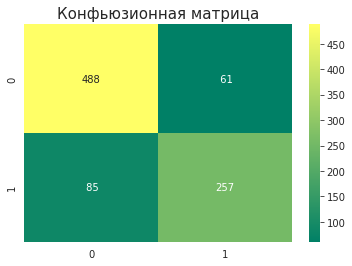

In [65]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,y_train)
print('--------------Качество модели "Случайный лес"----------------------------')
model_accuracy(random_forest,all_features,Targeted_feature)

--------------Качество модели "Дерево принятия решений"----------------------------
Качество модели составляет 98.39 %
Перекрестная проверка [Mean] : 81.48 %
Перекрестная проверка [Scores] : [0.83333333 0.80898876 0.70786517 0.84269663 0.84269663 0.87640449
 0.83146067 0.78651685 0.83146067 0.78651685]
Перекрестная проверка [Standard Deviation] : 0.04395326964959248


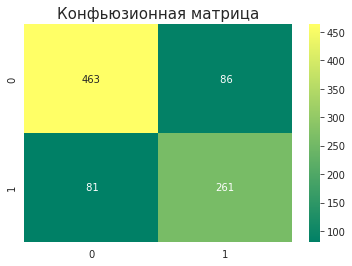

In [66]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
print('--------------Качество модели "Дерево принятия решений"----------------------------')
model_accuracy(decision_tree,all_features,Targeted_feature)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


--------------Качество модели метода "Опорных векторов"----------------------------
Качество модели составляет 86.04 %


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

Перекрестная проверка [Mean] : 85.41 %
Перекрестная проверка [Scores] : [0.85555556 0.8988764  0.78651685 0.8988764  0.83146067 0.80898876
 0.83146067 0.83146067 0.92134831 0.87640449]
Перекрестная проверка [Standard Deviation] : 0.041439015349723544


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

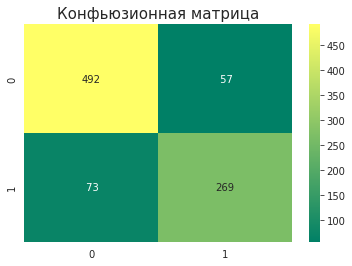

In [67]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
print('--------------Качество модели метода "Опорных векторов"----------------------------')
model_accuracy(linear_svc,all_features,Targeted_feature)

--------------Качество модели "Логистическая регрессия"----------------------------
Качество модели составляет 87.32 %
Перекрестная проверка [Mean] : 85.41 %
Перекрестная проверка [Scores] : [0.85555556 0.88764045 0.7752809  0.91011236 0.82022472 0.79775281
 0.84269663 0.83146067 0.92134831 0.8988764 ]
Перекрестная проверка [Standard Deviation] : 0.04687141346330077


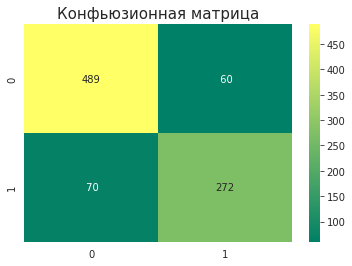

In [69]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print('--------------Качество модели "Логистическая регрессия"----------------------------')
model_accuracy(logreg,all_features,Targeted_feature)

##1.18. Ранжирование признаков по важности

In [77]:
importance = pd.DataFrame({
    'feature': X.columns,
    'importance' :np.round(random_forest.feature_importances_,3)
})

importance = importance.sort_values('importance', ascending=False).set_index('feature')

importance.head(26)

,importance
feature,
Age,0.172
Fare,0.160
Survival_Rate,0.103
Title_4,0.084
Title_3,0.077
Sex_2,0.069
Ticket_Frequency,0.047
Sex_1,0.046
Pclass_3,0.039


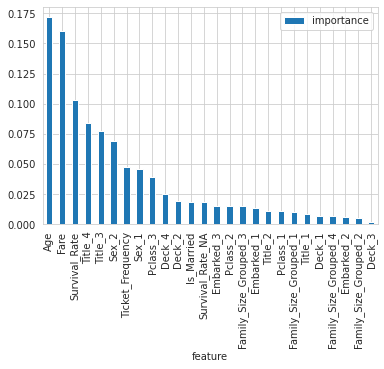

In [78]:
importance.plot.bar()

##1.19. Определение оптимальных параметров для модели "Случайный лес"

In [79]:
 from sklearn.model_selection import GridSearchCV
 param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10], "n_estimators": [100, 500, 1000,11000, 1500]}


 clf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),param_grid=param_grid,verbose=True)

 clf.fit(all_features, Targeted_feature)

 print(clf.best_score_) 
 print(clf.best_estimator_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
0.8484652564183038
RandomForestClassifier(min_samples_leaf=5, random_state=42)


In [ ]:
# clf.best_params_ 

##1.20. Применение параметров, полученных на предыдущем шаге

In [96]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(criterion='gini', 
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=42,
                                           n_jobs=-1,
                                           verbose=1)
random_forest.fit(all_features,Targeted_feature)
Y_prediction = (random_forest.predict(test_X)).astype(int)
random_forest.score(all_features,Targeted_feature)
acc_random_forest = round(random_forest.score(all_features,Targeted_feature) * 100, 2)


print(acc_random_forest)
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    2.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1100 out of 1100 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s


85.75
oob score: 84.74000000000001 %


--------------The Accuracy of the Final model----------------------------


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1100 out of 1100 | elapsed:    0.4s finished


Качество модели составляет 85.39 %


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1024 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    1.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1100 out of 1100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1060 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    1.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks   

Перекрестная проверка [Mean] : 84.85 %
Перекрестная проверка [Scores] : [0.86666667 0.8988764  0.78651685 0.87640449 0.86516854 0.80898876
 0.82022472 0.79775281 0.88764045 0.87640449]
Перекрестная проверка [Standard Deviation] : 0.038746291326123686


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1060 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1100 out of 1100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1060 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks   

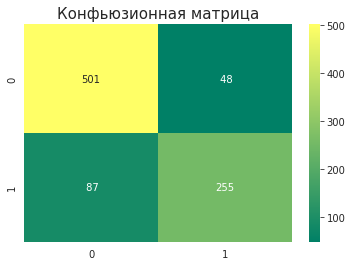

In [97]:
print('--------------The Accuracy of the Final model----------------------------')
model_accuracy(random_forest,all_features,Targeted_feature)

In [98]:
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": Y_prediction
})
submission.to_csv('submission.csv', index=False)

#2 вариант (81%)

##2.1. Импорт недостающих библиотек

In [322]:
sns.set(style="darkgrid")
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

SEED = 42

##2.2. Считывание данных

In [323]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_all = concat_df(df_train, df_test)

In [324]:
df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set' 

dfs = [df_train, df_test]

print('Число данных для обучения = {}'.format(df_train.shape[0]))
print('Число данных для проверки = {}\n'.format(df_test.shape[0]))
print('Размерность обучающей выборки (X) = {}'.format(df_train.shape))
print('Размерность обучающей выборки (y) = {}\n'.format(df_train['Survived'].shape[0]))
print('Размерность тестовой выборки (X) = {}'.format(df_test.shape))
print('Размерность тестовой выборки (y) = {}\n'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)

Число данных для обучения = 891
Число данных для проверки = 418

Размерность обучающей выборки (X) = (891, 12)
Размерность обучающей выборки (y) = 891

Размерность тестовой выборки (X) = (418, 11)
Размерность тестовой выборки (y) = 418

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


##2.3. Поиск пропущенных значений

In [325]:
# Еще одно представление пропущенных значений
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
    
for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Training Set
PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2


Test Set
PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 86
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 327
Embarked column missing values: 0




##2.4. Корреляция показателей с возрастом

In [326]:
df_all_corr = df_all.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_all_corr[df_all_corr['Feature 1'] == 'Age']

,Feature 1,Feature 2,Correlation Coefficient
0,Age,Age,1.000000
9,Age,Pclass,0.408106
18,Age,SibSp,0.243699
21,Age,Fare,0.178740
26,Age,Parch,0.150917
30,Age,Survived,0.077221
41,Age,PassengerId,0.028814


In [327]:
print('Средний возраст всех пассажиров: {}'.format(df_all['Age'].median()))

# Замена пустых значений для возраста
df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Средний возраст всех пассажиров: 28.0


##2.5. Embarked - категориальный признак, во всем датасете есть 2 пассажира с пустыми значениями. Так как у них одинаковый номер билета, то они знают друг друга

In [328]:
df_all[df_all['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


> *Mrs Stone boarded the Titanic in Southampton on 10 April 1912 and was travelling in first class with her maid Amelie Icard. She occupied cabin B-28.*

In [329]:
df_all['Embarked'] = df_all['Embarked'].fillna('S')

##2.6. Можно предположить, что Fare связан с размером семьи (Parch и SibSp) и характеристиками Pclass. Медианное значение Fare можно выборать для заполнения недостающего значения.

In [330]:
df_all[df_all['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [331]:
med_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]

df_all['Fare'] = df_all['Fare'].fillna(med_fare)

##2.7. Признак Cabin

###2.7.1 В столбце признака Cabin есть много пропусков, однако его нельзя убрать, так как некоторые каюты могут иметь более высокие показатели "выживаемости".

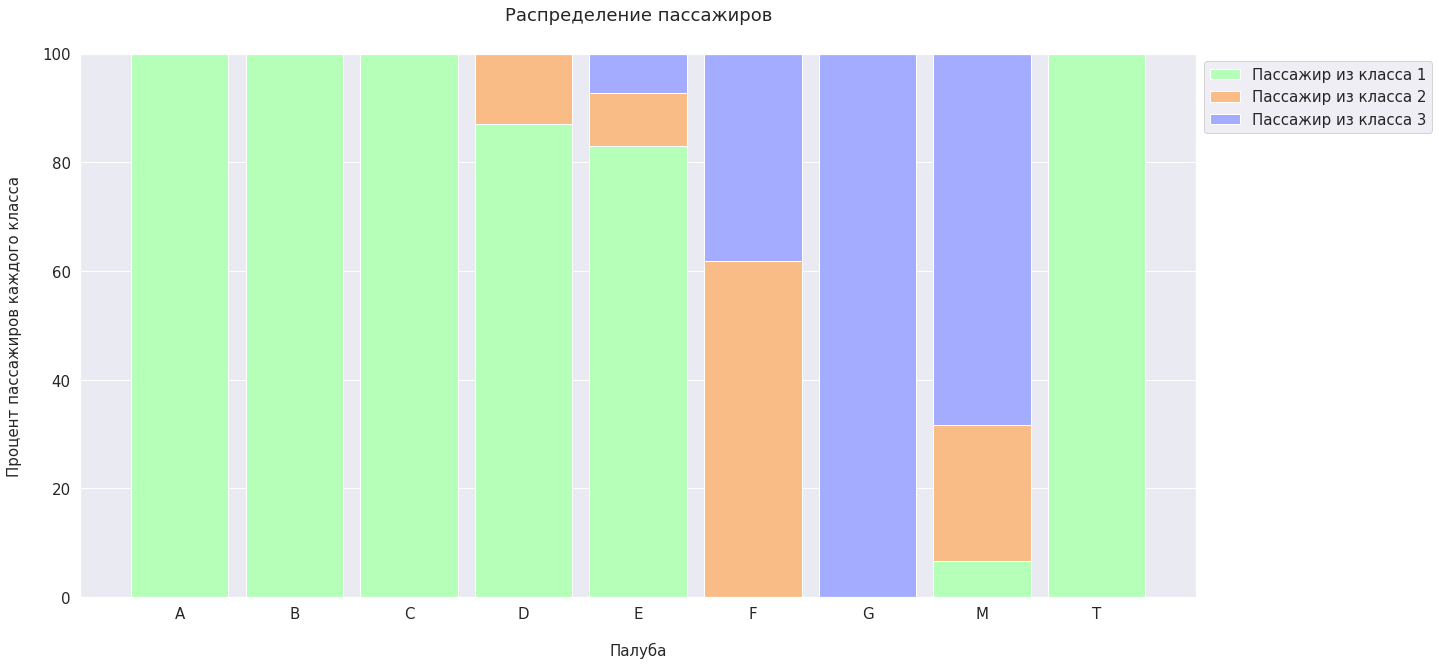

In [332]:
# Создание колонки Deck по первой букве колонки Cabin (M означает Пусто)
df_all['Deck'] = df_all['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

df_all_decks = df_all.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()

def get_pclass_dist(df):
    
    # Создание словаря для подсчета пассажиров по каждому классу и на каждой палубе
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0]    
    
    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count 
            except KeyError:
                deck_counts[deck][pclass] = 0
                
    df_decks = pd.DataFrame(deck_counts)    
    deck_percentages = {}

    # Создание словаря для процентного отношения пасаажиров каждого класса по палубам
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
        
    return deck_counts, deck_percentages

def display_pclass_dist(percentages):
    
    df_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85
    
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, pclass1, color='#b5ffb9', edgecolor='white', width=bar_width, label='Пассажир из класса 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#f9bc86', edgecolor='white', width=bar_width, label='Пассажир из класса 2')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#a3acff', edgecolor='white', width=bar_width, label='Пассажир из класса 3')

    plt.xlabel('Палуба', size=15, labelpad=20)
    plt.ylabel('Процент пассажиров каждого класса', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Распределение пассажиров', size=18, y=1.05)   
    
    plt.show()    

all_deck_count, all_deck_per = get_pclass_dist(df_all_decks)
display_pclass_dist(all_deck_per)

* Пассажиры из класса 1 занимают **100%** кают: **A**, **B** и **C** 
* Каюта **D** содержит **87%** пассажиров из 1-го класса и **13%** пассажиров из 2-го класса
* Каюту **E** занимают **83%** пассажиры из 1-го класса, **10%** из 2-го класса и **7%** из 3-го класса
* Каюту **F** содержит **62%** пассажиров 2-го класса и **38%** пассажиров 3-го класса
* В каюте **G** находится **100%** пассажиров 3-го класса
* В каюте **T** находится 1 пассажир 1-го класса. Он имеет большее сходство с пассажирами из каюты **A**, поэтому переместим его туда. 
* Пассажиры с пометкой каюты **M** пропущенные значения в столбце `Cabin`. Трудно найти информацию об их настоящей каюте, поэтому **M** будет еще 1 палуба.

In [333]:
idx = df_all[df_all['Deck'] == 'T'].index
df_all.loc[idx, 'Deck'] = 'A'

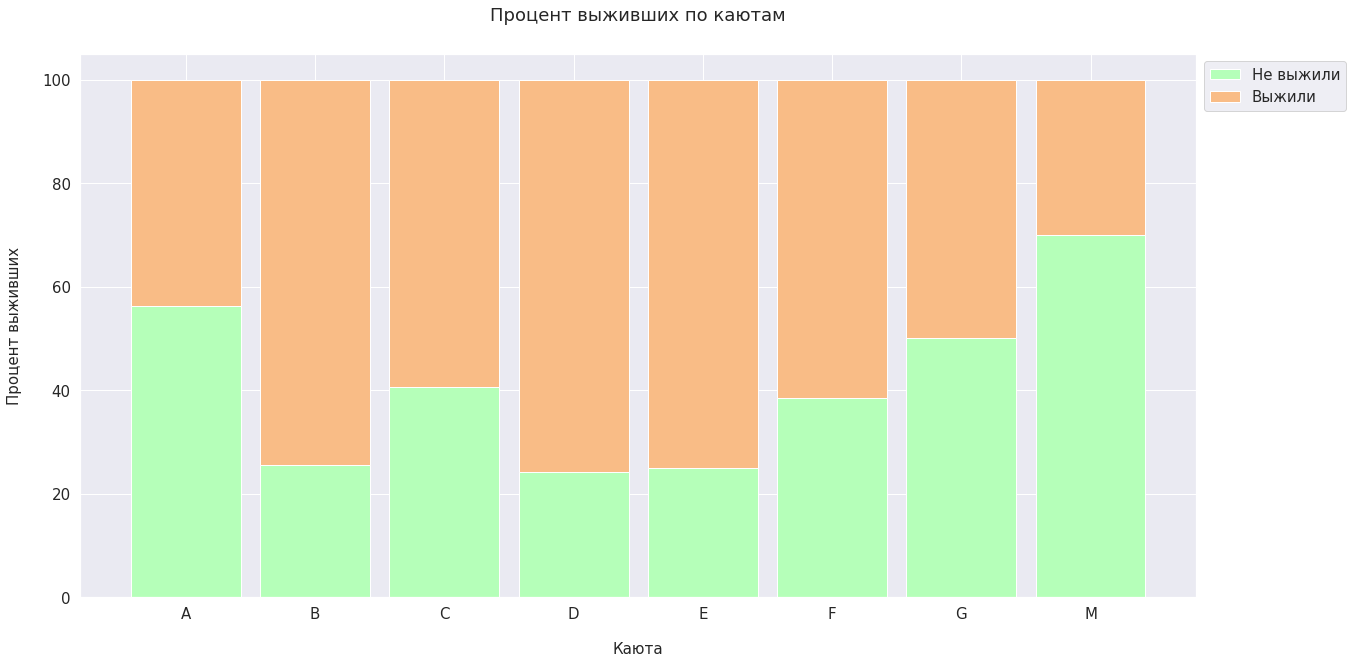

In [334]:
# количество выживших по палубам
df_all_decks_survived = df_all.groupby(['Deck', 'Survived']).count().drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
                                                                                   'Embarked', 'Pclass', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name':'Count'}).transpose()

def get_survived_dist(df):
    
    # Создаем словарь с выжившими по каждой каюте
    surv_counts = {'A':{}, 'B':{}, 'C':{}, 'D':{}, 'E':{}, 'F':{}, 'G':{}, 'M':{}}
    decks = df.columns.levels[0]    

    for deck in decks:
        for survive in range(0, 2):
            surv_counts[deck][survive] = df[deck][survive][0]
            
    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}

    for col in df_surv.columns:
        surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]
        
    return surv_counts, surv_percentages

def display_surv_dist(percentages):
    
    df_survived_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85    

    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, not_survived, color='#b5ffb9', edgecolor='white', width=bar_width, label="Не выжили")
    plt.bar(bar_count, survived, bottom=not_survived, color='#f9bc86', edgecolor='white', width=bar_width, label="Выжили")
 
    plt.xlabel('Каюта', size=15, labelpad=20)
    plt.ylabel('Процент выживших', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Процент выживших по каютам', size=18, y=1.05)
    
    plt.show()

all_surv_count, all_surv_per = get_survived_dist(df_all_decks_survived)
display_surv_dist(all_surv_per)

У каждой каюты разный процент выживаемости. Каюты **B**, **C**, **D** и **E** имеют самые высокие показатели выживаемости. Эти палубы в основном заняты пассажирами 1-го класса. Самый низкий показатель выживаемости у палубы **M**, на которой в основном размещаются пассажиры 2-го и 3-го классов.
* Каюты **A**, **B** и **C** обозначены как **ABC**, потому что все они имеют пассажиров только 1-го класса.
* Каюты **D** и **E** обозначены как **DE**, потому что обе они имеют схожее распределение пассажиров по классам и одинаковый коэффициент выживаемости
* Каюты **F** и **G** обозначены как **FG** по той же причине, что и выше.
* Каюту **M** не нужно группировать с другими палубами, потому что она сильно отличается от других и имеет самый низкий коэффициент выживаемости.

In [335]:
df_all['Deck'] = df_all['Deck'].replace(['A', 'B', 'C'], 'ABC')
df_all['Deck'] = df_all['Deck'].replace(['D', 'E'], 'DE')
df_all['Deck'] = df_all['Deck'].replace(['F', 'G'], 'FG')

df_all['Deck'].value_counts()

M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

In [336]:
#Удалим колонку с каютами
df_all.drop(['Cabin'], inplace=True, axis=1)

df_train, df_test = divide_df(df_all)
dfs = [df_train, df_test]

for df in dfs:
    display_missing(df)

Age column missing values: 0
Embarked column missing values: 0
Fare column missing values: 0
Name column missing values: 0
Parch column missing values: 0
PassengerId column missing values: 0
Pclass column missing values: 0
Sex column missing values: 0
SibSp column missing values: 0
Survived column missing values: 0
Ticket column missing values: 0
Deck column missing values: 0


Age column missing values: 0
Embarked column missing values: 0
Fare column missing values: 0
Name column missing values: 0
Parch column missing values: 0
PassengerId column missing values: 0
Pclass column missing values: 0
Sex column missing values: 0
SibSp column missing values: 0
Ticket column missing values: 0
Deck column missing values: 0




##2.8. Корреляция между признаками

In [337]:
# число выживших и нет
survived = df_train['Survived'].value_counts()[1]
not_survived = df_train['Survived'].value_counts()[0]
survived_per = survived / df_train.shape[0] * 100
not_survived_per = not_survived / df_train.shape[0] * 100

Самая высокая корреляция между признаками составляет **0,549500** в обучающем наборе и **0,577147** в тестовом наборе (между `Fare` и `Pclass`).

In [338]:
df_train_corr = df_train.drop(['PassengerId'], axis=1).corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True)
df_train_corr_nd = df_train_corr.drop(df_train_corr[df_train_corr['Correlation Coefficient'] == 1.0].index)

df_test_corr = df_test.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_test_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_test_corr.drop(df_test_corr.iloc[1::2].index, inplace=True)
df_test_corr_nd = df_test_corr.drop(df_test_corr[df_test_corr['Correlation Coefficient'] == 1.0].index)

In [339]:
# Корреляция параметров обучающего набора данных
corr = df_train_corr_nd['Correlation Coefficient'] > 0.1
df_train_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
6,Fare,Pclass,0.549500
8,Age,Pclass,0.417667
10,Parch,SibSp,0.414838
12,Pclass,Survived,0.338481
14,Fare,Survived,0.257307
16,Age,SibSp,0.249747
18,Parch,Fare,0.216225
20,Parch,Age,0.176733
22,SibSp,Fare,0.159651
24,Age,Fare,0.124061


In [340]:
# Корреляция параметров тестового набора данных

corr = df_test_corr_nd['Correlation Coefficient'] > 0.1
df_test_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
6,Pclass,Fare,0.577489
8,Age,Pclass,0.526789
10,Age,Fare,0.345347
12,SibSp,Parch,0.306895
14,Parch,Fare,0.230410
16,Fare,SibSp,0.172032


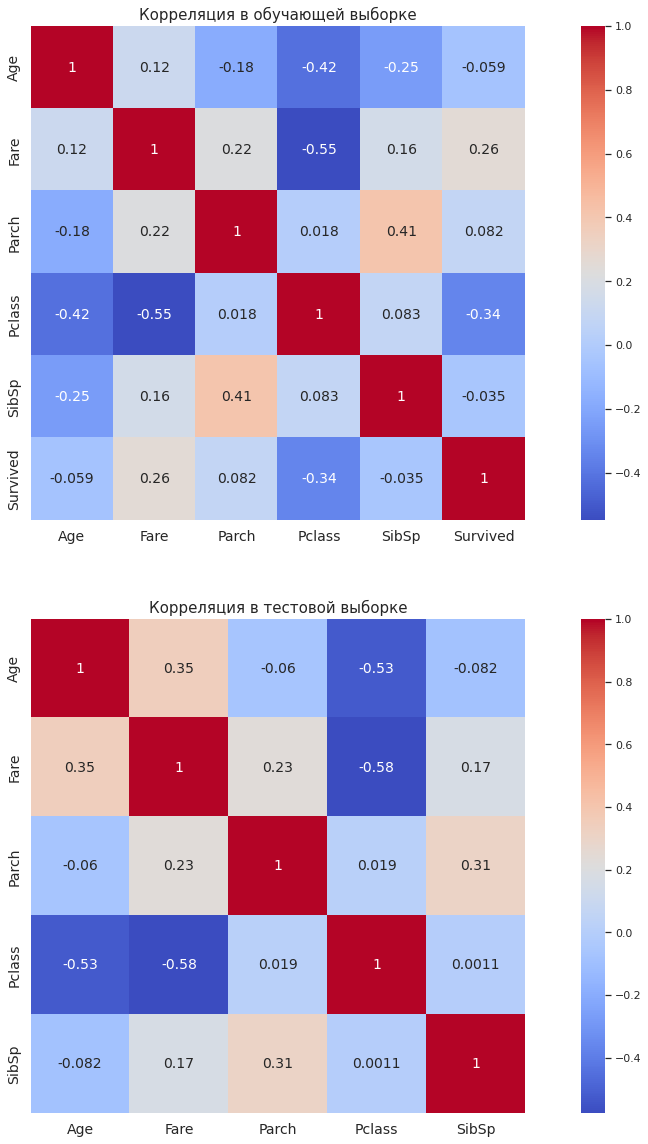

In [341]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))

sns.heatmap(df_train.drop(['PassengerId'], axis=1).corr(), ax=axs[0], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})
sns.heatmap(df_test.drop(['PassengerId'], axis=1).corr(), ax=axs[1], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})

for i in range(2):    
    axs[i].tick_params(axis='x', labelsize=14)
    axs[i].tick_params(axis='y', labelsize=14)
    
axs[0].set_title('Корреляция в обучающей выборке', size=15)
axs[1].set_title('Корреляция в тестовой выборке', size=15)

plt.show()

Обе характеристики (`Age` и `Fare`) имеют четкое деление для обучения дерева решений. Однако проблема для обеих характеристик заключается в том, что распределение имеет больше пропусков/отклонений/аномальных значений в обучающей выборке, чем в тестовой выборке. По этой причине модель может оказаться неспособной к обобщению на тестовой выборке.
* Распределение по `Age` четко показывает, что выживаемость детей младше 15 лет выше, чем в других возрастных группах.
* Распределение по `Fare` выше на концах распределения. Распределение также имеет положительный перекос из-за очень больших выбросов.

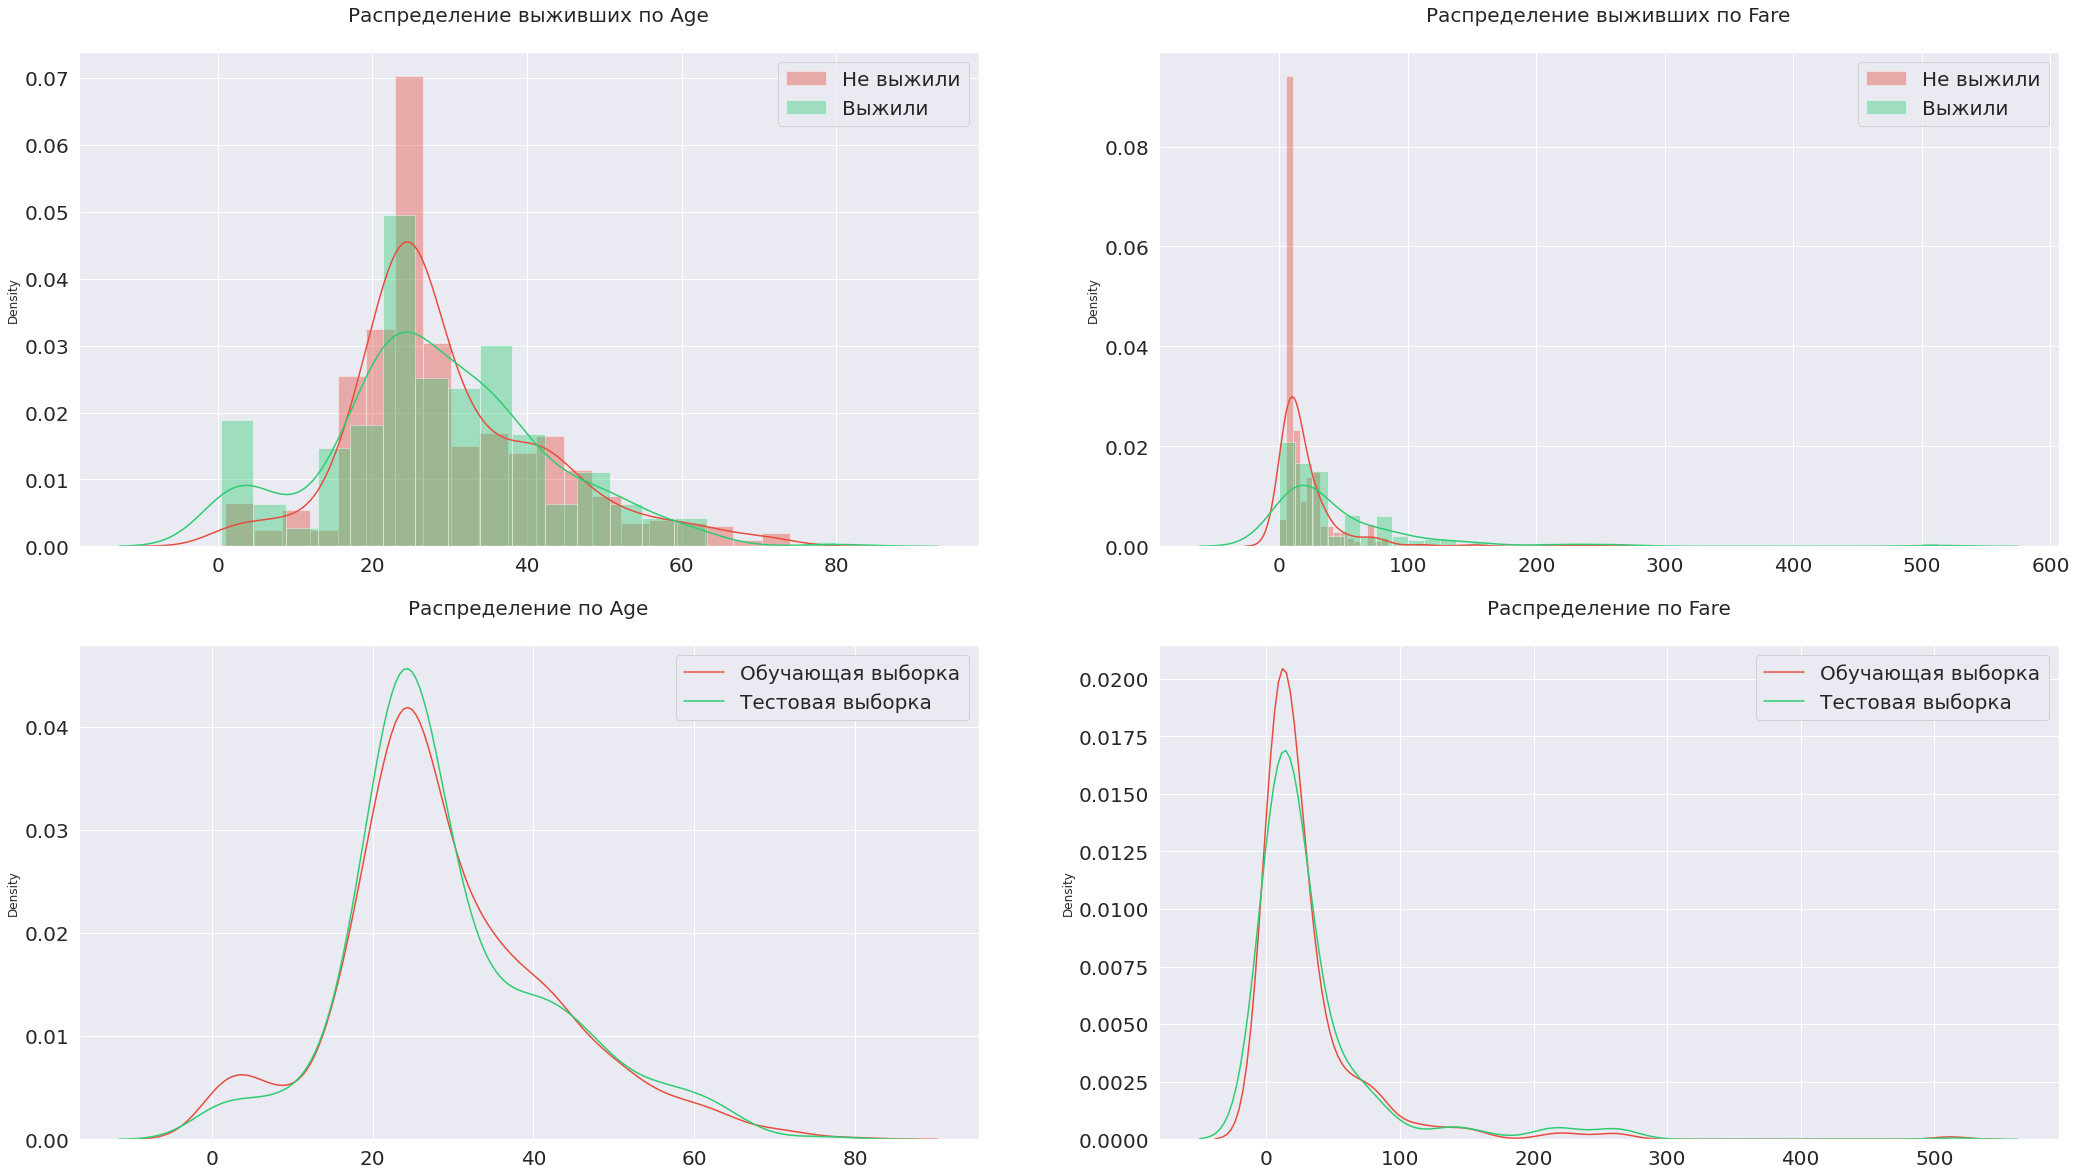

In [342]:
cont_features = ['Age', 'Fare']
surv = df_train['Survived'] == 1

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(cont_features):    
    # Распределение по выживаемости
    sns.distplot(df_train[~surv][feature], label='Не выжили', hist=True, color='#e74c3c', ax=axs[0][i])
    sns.distplot(df_train[surv][feature], label='Выжили', hist=True, color='#2ecc71', ax=axs[0][i])
    
    # Distribution of feature in dataset
    sns.distplot(df_train[feature], label='Обучающая выборка', hist=False, color='#e74c3c', ax=axs[1][i])
    sns.distplot(df_test[feature], label='Тестовая выборка', hist=False, color='#2ecc71', ax=axs[1][i])
    
    axs[0][i].set_xlabel('')
    axs[1][i].set_xlabel('')
    
    for j in range(2):        
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
    
    axs[0][i].legend(loc='upper right', prop={'size': 20})
    axs[1][i].legend(loc='upper right', prop={'size': 20})
    axs[0][i].set_title('Распределение выживших по {}'.format(feature), size=20, y=1.05)

axs[1][0].set_title('Распределение по {}'.format('Age'), size=20, y=1.05)
axs[1][1].set_title('Распределение по {}'.format('Fare'), size=20, y=1.05)
        
plt.show()

##2.9. Категориальные признаки

### Fare

Каждый категориальный признак имеет хотя бы один класс с высоким уровнем смертности. Эти классы нужны для определения: является ли пассажир выжившим или нет. Лучшими категориальными признаками являются `Pclass` и `Sex`, поскольку они имеют наиболее однородные распределения.
* Пассажиры, высаженные из **Southampton**, имеют более низкий уровень выживаемости в отличие от других портов. Более половины пассажиров, высаженных из **Cherbourg**, выжили. Это наблюдение может быть связано с признаком `Pclass`.
* Признаки `Parch` и `SibSp` показывают, что пассажиры, имеющие только одного члена семьи, имеют более высокий уровень выживаемости.

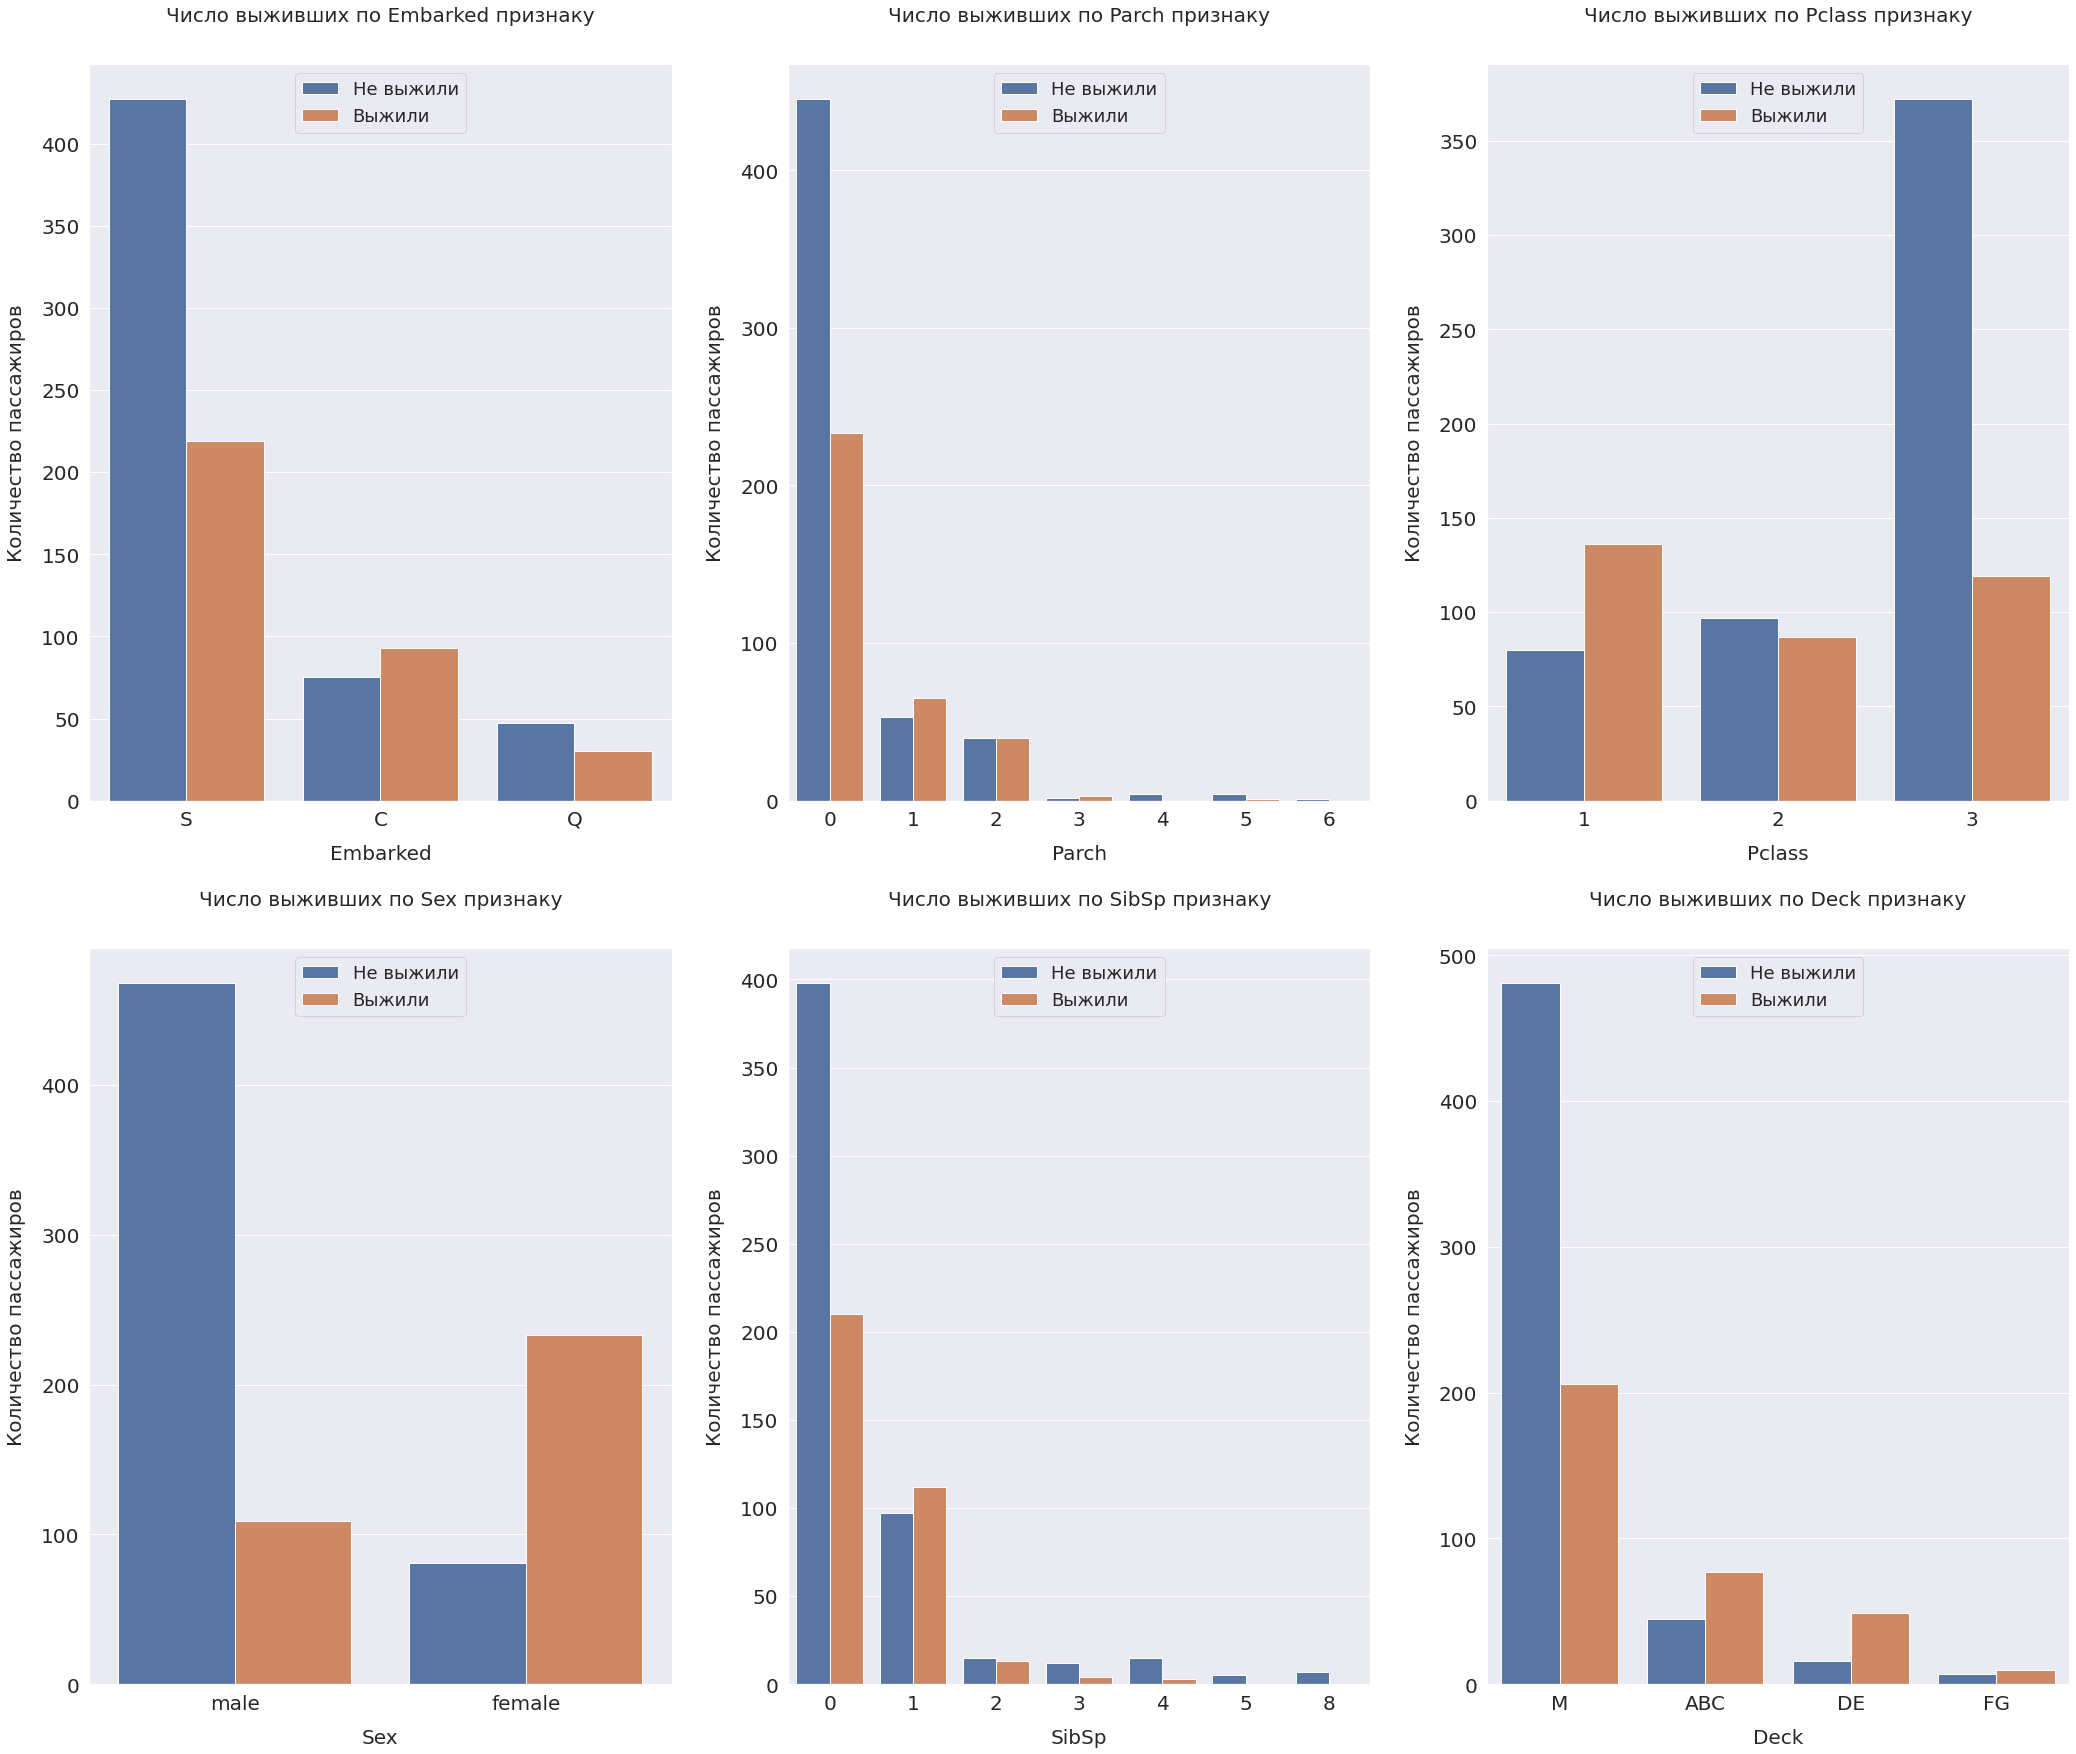

In [343]:
cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Deck']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=df_train)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Количество пассажиров', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Не выжили', 'Выжили'], loc='upper center', prop={'size': 18})
    plt.title('Число выживших по {} признаку'.format(feature), size=20, y=1.05)

plt.show()

In [344]:
df_all = concat_df(df_train, df_test)
df_all.head(3)

,Age,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,M,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,ABC,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,M,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282


In [345]:
df_all['Fare'] = pd.qcut(df_all['Fare'], 13) # разделение пассажиров по Fare на 13 групп

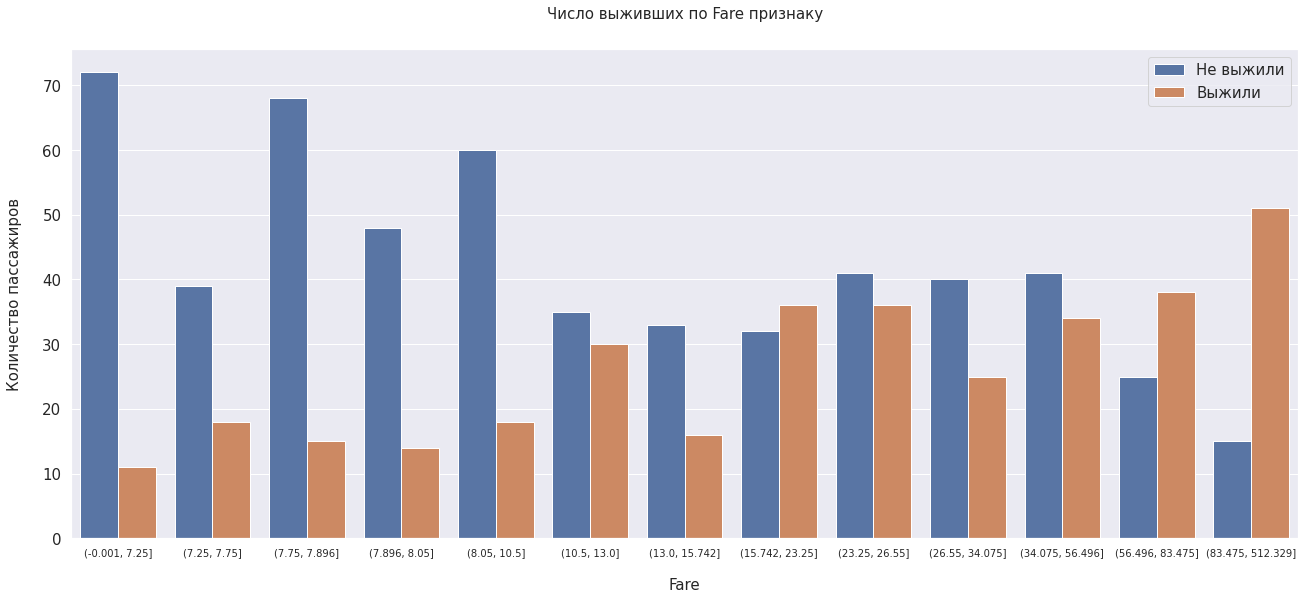

In [346]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df_all)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Количество пассажиров', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Не выжили', 'Выжили'], loc='upper right', prop={'size': 15})
plt.title('Число выживших по {} признаку'.format('Fare'), size=15, y=1.05)

plt.show()

### Age

Признак `Age` имеет нормальное распределение с некоторыми пиками и скачками, для возраста используются 10 групп. Первая группа имеет самый высокий уровень выживаемости, а 4-я группа - самый низкий уровень выживаемости. Это самые большие пики в распределении. Существует также необычная группа (34.0, 40.0] с высоким уровнем выживаемости, которая была показана в этом процессе.

In [347]:
df_all['Age'] = pd.qcut(df_all['Age'], 10)

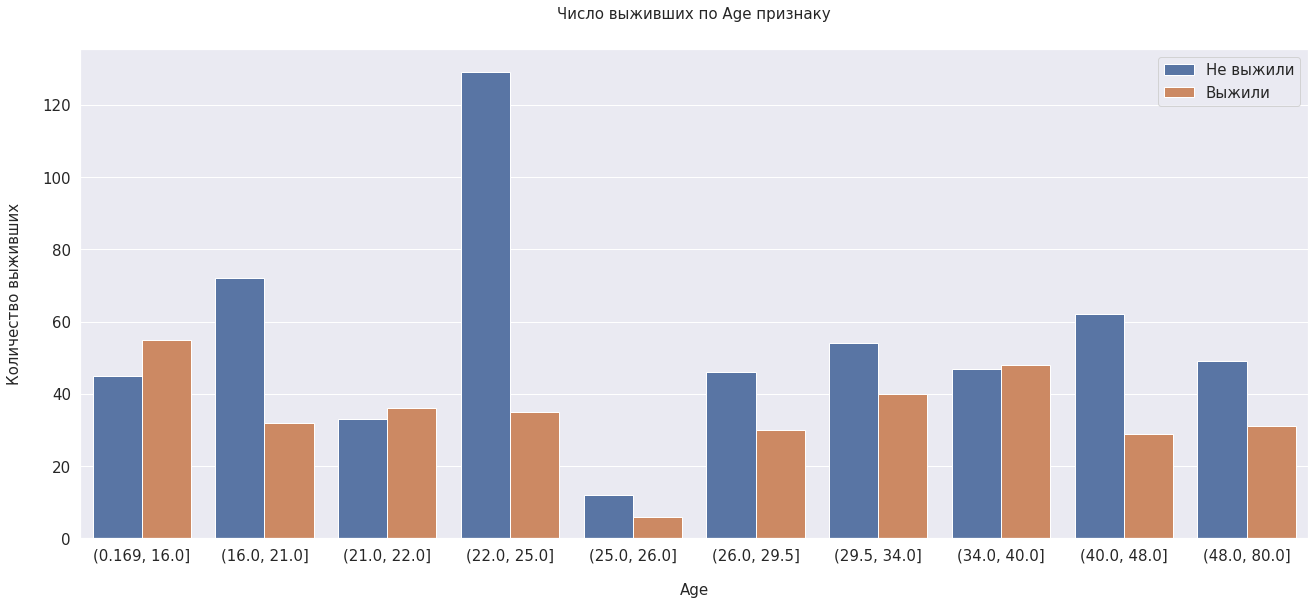

In [348]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Age', hue='Survived', data=df_all)

plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Количество выживших', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Не выжили', 'Выжили'], loc='upper right', prop={'size': 15})
plt.title('Число выживших по {} признаку'.format('Age'), size=15, y=1.05)

plt.show()

Family_Size создадим с помощью добавления SibSp, Parch и 1. SibSp - количество братьев, сестер и супругов, а Parch - количество родителей и детей. Столбцы складываются для того, чтобы найти общий размер семьи. Добавив в конце 1, получаем текущего пассажира. Графики показали, что размер семьи является одной из причин выживания, поскольку разные значения имеют разную выживаемость.

### Family_size

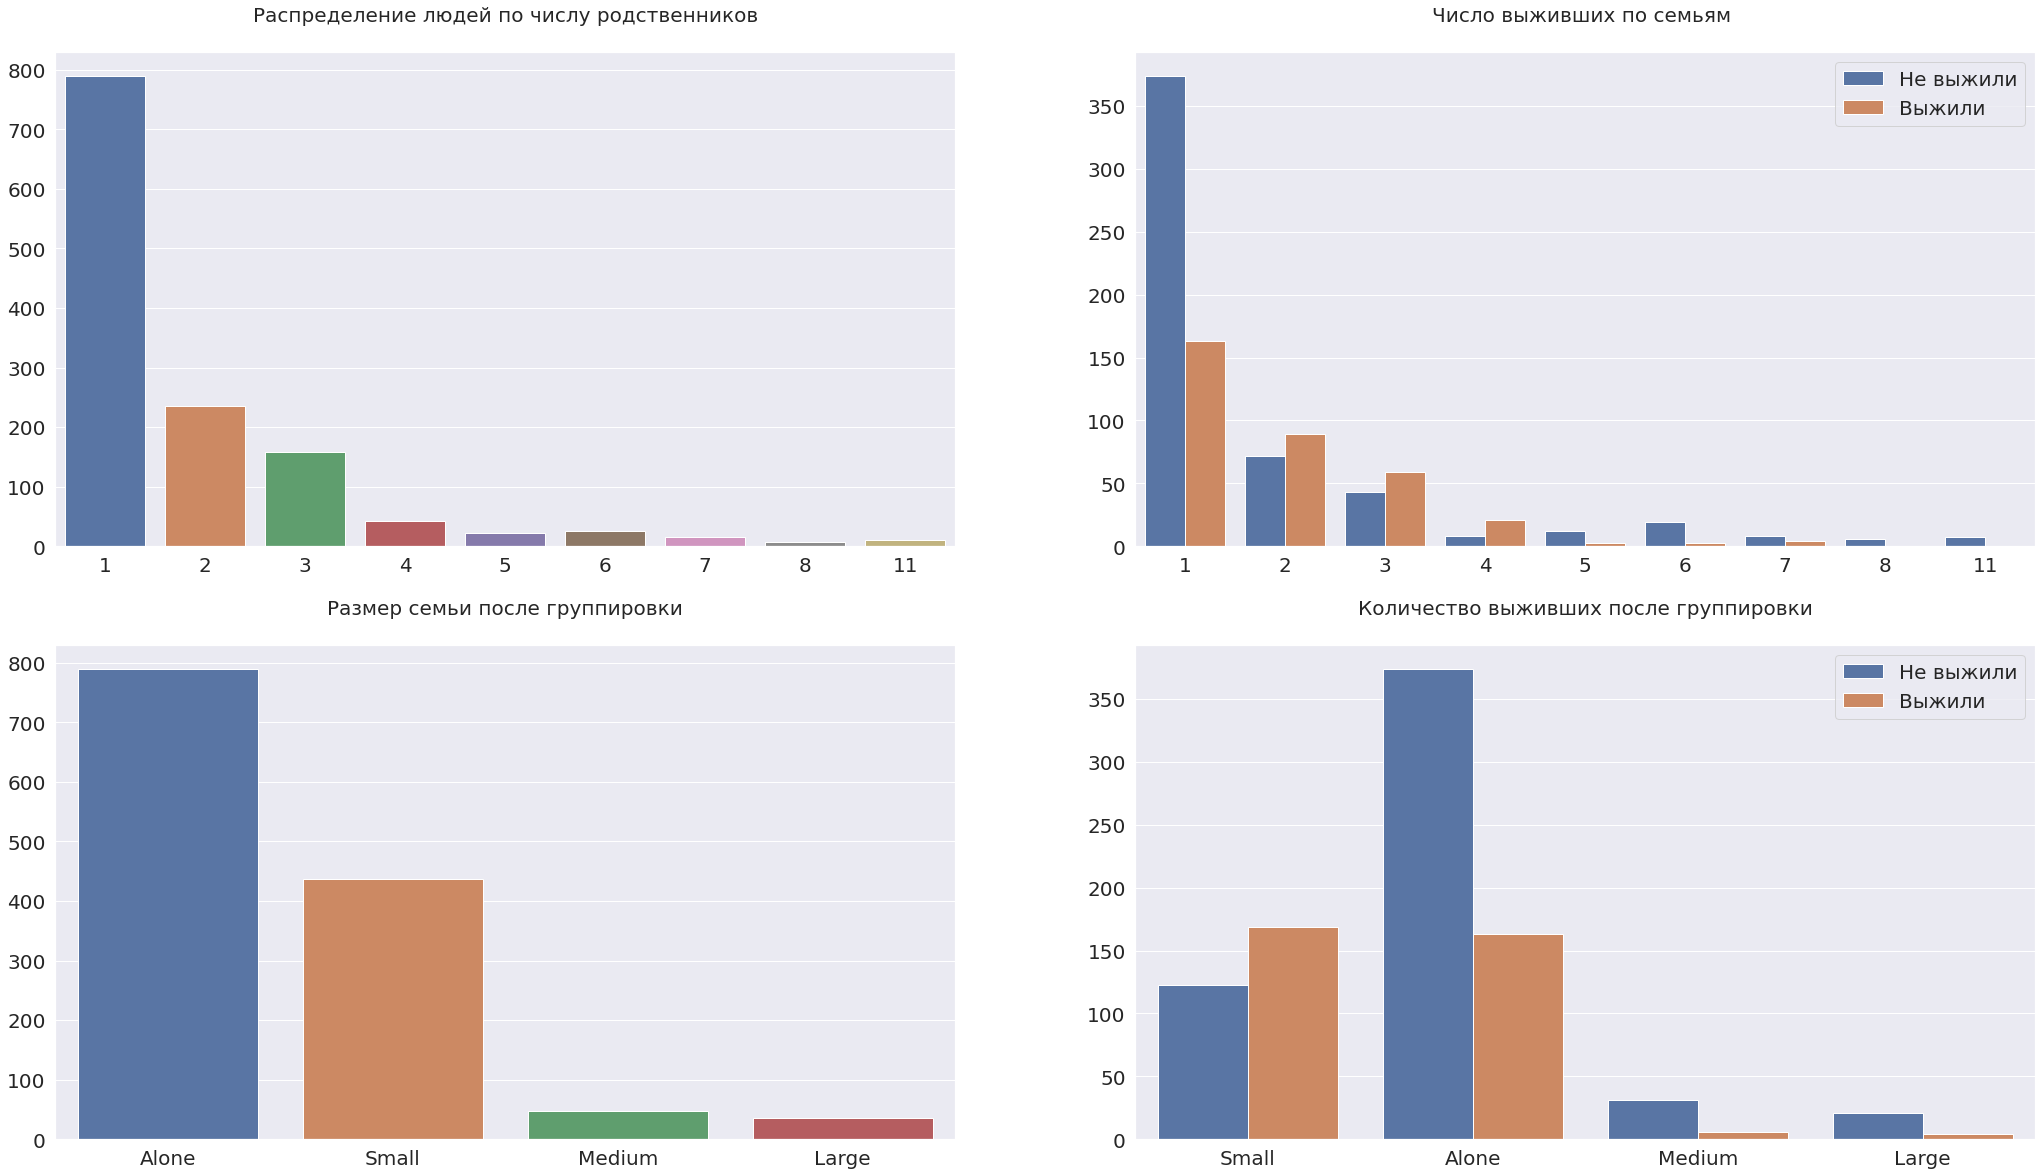

In [349]:
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1

fig, axs = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=df_all['Family_Size'].value_counts().index, y=df_all['Family_Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Survived', data=df_all, ax=axs[0][1])

axs[0][0].set_title('Распределение людей по числу родственников', size=20, y=1.05)
axs[0][1].set_title('Число выживших по семьям ', size=20, y=1.05)

family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
df_all['Family_Size_Grouped'] = df_all['Family_Size'].map(family_map)

sns.barplot(x=df_all['Family_Size_Grouped'].value_counts().index, y=df_all['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=df_all, ax=axs[1][1])

axs[1][0].set_title('Размер семьи после группировки', size=20, y=1.05)
axs[1][1].set_title('Количество выживших после группировки', size=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['Не выжили', 'Выжили'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()

Существует слишком много уникальных значений Билета, чтобы их анализировать, поэтому группировка по частоте упрощает работу. Многие пассажиры путешествуют группами. Эти группы состоят из друзей, нянь, горничных и т.д. Их нельзя считать за семью, но они пользуются одним и тем же билетом.
Если префиксы в характеристике билета имеют какое-то значение, то они уже отражены в характеристиках Pclass или Embarked, потому что это единственная логическая информация, которая может быть получена из характеристики билета.

### Ticket_Frequency

In [350]:
df_all['Ticket_Frequency'] = df_all.groupby('Ticket')['Ticket'].transform('count')

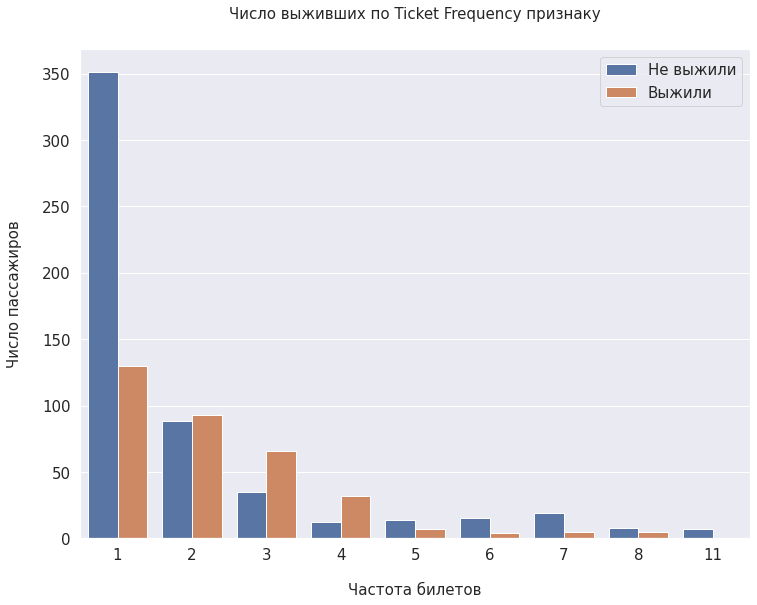

In [351]:
fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=df_all)

plt.xlabel('Частота билетов', size=15, labelpad=20)
plt.ylabel('Число пассажиров', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Не выжили', 'Выжили'], loc='upper right', prop={'size': 15})
plt.title('Число выживших по {} признаку'.format('Ticket Frequency'), size=15, y=1.05)

plt.show()

### Title и Married

In [352]:
df_all['Title'] = df_all['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
df_all['Is_Married'] = 0
df_all['Is_Married'].loc[df_all['Title'] == 'Mrs'] = 1

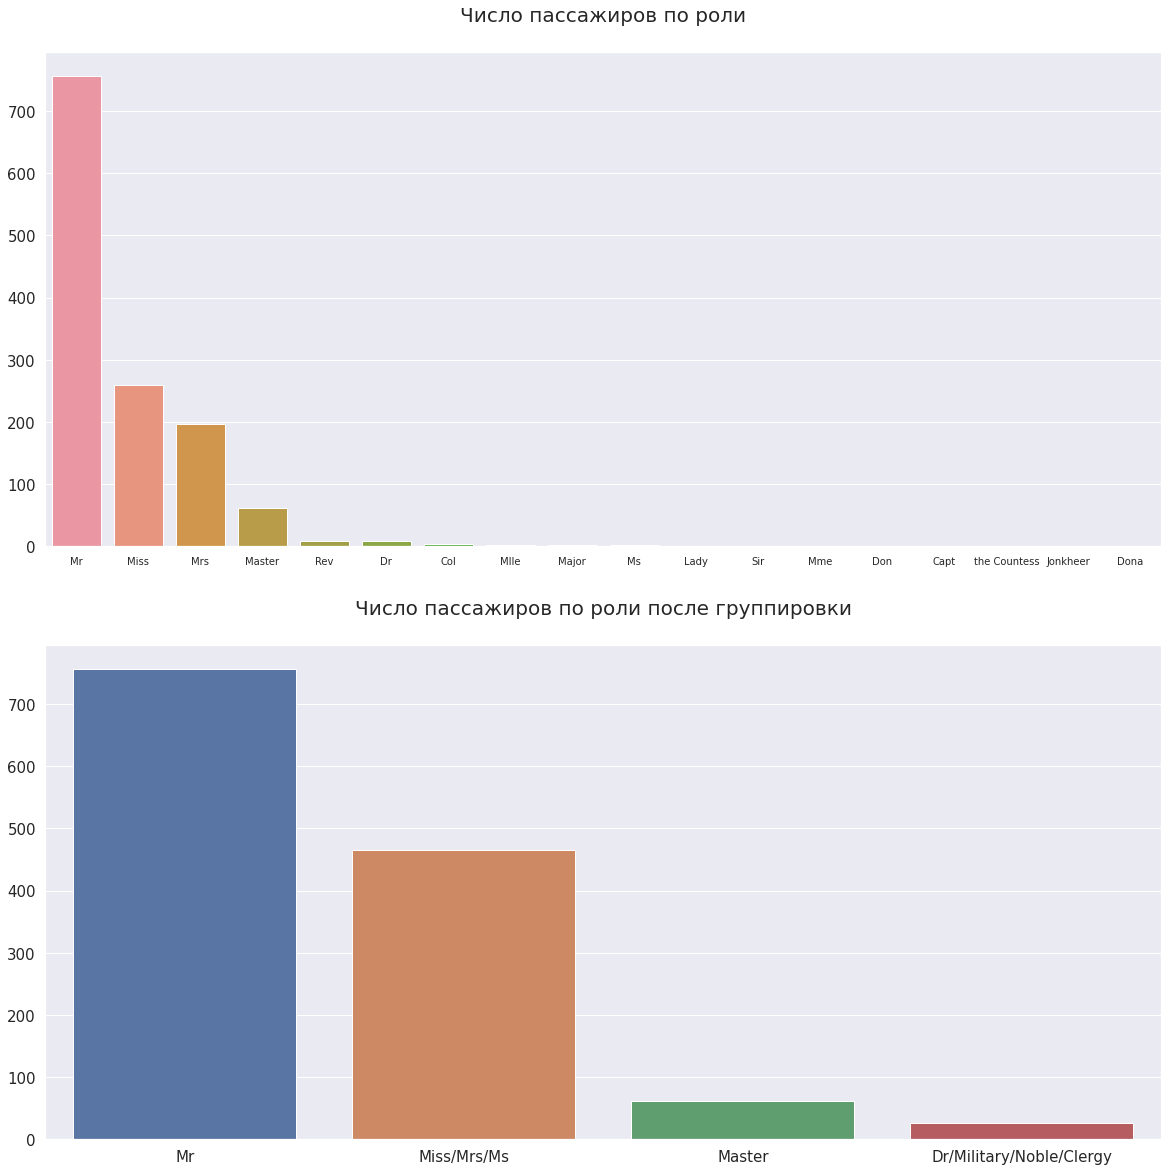

In [353]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))
sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):    
    axs[i].tick_params(axis='y', labelsize=15)

axs[0].set_title('Число пассажиров по роли', size=20, y=1.05)

df_all['Title'] = df_all['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df_all['Title'] = df_all['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Число пассажиров по роли после группировки', size=20, y=1.05)

plt.show()

### Encoding

In [303]:
def extract_surname(data):    
    
    families = []
    
    for i in range(len(data)):        
        name = data.iloc[i]

        if '(' in name:
            name_no_bracket = name.split('(')[0] 
        else:
            name_no_bracket = name
            
        family = name_no_bracket.split(',')[0]
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]
        
        for c in string.punctuation:
            family = family.replace(c, '').strip()
            
        families.append(family)
            
    return families

df_all['Family'] = extract_surname(df_all['Name'])
df_train = df_all.loc[:890]
df_test = df_all.loc[891:]
dfs = [df_train, df_test]

In [304]:
non_unique_families = [x for x in df_train['Family'].unique() if x in df_test['Family'].unique()]
non_unique_tickets = [x for x in df_train['Ticket'].unique() if x in df_test['Ticket'].unique()]

df_family_survival_rate = df_train.groupby('Family')['Survived', 'Family','Family_Size'].median()
df_ticket_survival_rate = df_train.groupby('Ticket')['Survived', 'Ticket','Ticket_Frequency'].median()

family_rates = {}
ticket_rates = {}

for i in range(len(df_family_survival_rate)):
    if df_family_survival_rate.index[i] in non_unique_families and df_family_survival_rate.iloc[i, 1] > 1:
        family_rates[df_family_survival_rate.index[i]] = df_family_survival_rate.iloc[i, 0]

for i in range(len(df_ticket_survival_rate)):
    if df_ticket_survival_rate.index[i] in non_unique_tickets and df_ticket_survival_rate.iloc[i, 1] > 1:
        ticket_rates[df_ticket_survival_rate.index[i]] = df_ticket_survival_rate.iloc[i, 0]

In [305]:
mean_survival_rate = np.mean(df_train['Survived'])

train_family_survival_rate = []
train_family_survival_rate_NA = []
test_family_survival_rate = []
test_family_survival_rate_NA = []

for i in range(len(df_train)):
    if df_train['Family'][i] in family_rates:
        train_family_survival_rate.append(family_rates[df_train['Family'][i]])
        train_family_survival_rate_NA.append(1)
    else:
        train_family_survival_rate.append(mean_survival_rate)
        train_family_survival_rate_NA.append(0)
        
for i in range(len(df_test)):
    if df_test['Family'].iloc[i] in family_rates:
        test_family_survival_rate.append(family_rates[df_test['Family'].iloc[i]])
        test_family_survival_rate_NA.append(1)
    else:
        test_family_survival_rate.append(mean_survival_rate)
        test_family_survival_rate_NA.append(0)
        
df_train['Family_Survival_Rate'] = train_family_survival_rate
df_train['Family_Survival_Rate_NA'] = train_family_survival_rate_NA
df_test['Family_Survival_Rate'] = test_family_survival_rate
df_test['Family_Survival_Rate_NA'] = test_family_survival_rate_NA

train_ticket_survival_rate = []
train_ticket_survival_rate_NA = []
test_ticket_survival_rate = []
test_ticket_survival_rate_NA = []

for i in range(len(df_train)):
    if df_train['Ticket'][i] in ticket_rates:
        train_ticket_survival_rate.append(ticket_rates[df_train['Ticket'][i]])
        train_ticket_survival_rate_NA.append(1)
    else:
        train_ticket_survival_rate.append(mean_survival_rate)
        train_ticket_survival_rate_NA.append(0)
        
for i in range(len(df_test)):
    if df_test['Ticket'].iloc[i] in ticket_rates:
        test_ticket_survival_rate.append(ticket_rates[df_test['Ticket'].iloc[i]])
        test_ticket_survival_rate_NA.append(1)
    else:
        test_ticket_survival_rate.append(mean_survival_rate)
        test_ticket_survival_rate_NA.append(0)
        
df_train['Ticket_Survival_Rate'] = train_ticket_survival_rate
df_train['Ticket_Survival_Rate_NA'] = train_ticket_survival_rate_NA
df_test['Ticket_Survival_Rate'] = test_ticket_survival_rate
df_test['Ticket_Survival_Rate_NA'] = test_ticket_survival_rate_NA

In [306]:
for df in [df_train, df_test]:
    df['Survival_Rate'] = (df['Ticket_Survival_Rate'] + df['Family_Survival_Rate']) / 2
    df['Survival_Rate_NA'] = (df['Ticket_Survival_Rate_NA'] + df['Family_Survival_Rate_NA']) / 2    

##2.10. Изменение признаков

In [307]:
non_numeric_features = ['Embarked', 'Sex', 'Deck', 'Title', 'Family_Size_Grouped', 'Age', 'Fare']

for df in dfs:
    for feature in non_numeric_features:        
        df[feature] = LabelEncoder().fit_transform(df[feature])

In [308]:
cat_features = ['Pclass', 'Sex', 'Deck', 'Embarked', 'Title', 'Family_Size_Grouped']
encoded_features = []

for df in dfs:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

df_train = pd.concat([df_train, *encoded_features[:6]], axis=1)
df_test = pd.concat([df_test, *encoded_features[6:]], axis=1)

In [309]:
df_all = concat_df(df_train, df_test)
drop_cols = ['Deck', 'Embarked', 'Family', 'Family_Size', 'Family_Size_Grouped', 'Survived',
             'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Ticket', 'Title',
            'Ticket_Survival_Rate', 'Family_Survival_Rate', 'Ticket_Survival_Rate_NA', 'Family_Survival_Rate_NA']

df_all.drop(columns=drop_cols, inplace=True)

df_all.head()

,Age,Deck_1,Deck_2,Deck_3,Deck_4,Embarked_1,Embarked_2,Embarked_3,Family_Size_Grouped_1,Family_Size_Grouped_2,...,Pclass_3,Sex_1,Sex_2,Survival_Rate,Survival_Rate_NA,Ticket_Frequency,Title_1,Title_2,Title_3,Title_4
0,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.383838,0.0,1,0.0,0.0,0.0,1.0
1,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.000000,1.0,2,0.0,0.0,1.0,0.0
2,4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.383838,0.0,1,0.0,0.0,1.0,0.0
3,7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.383838,0.0,2,0.0,0.0,1.0,0.0
4,7,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.383838,0.0,1,0.0,0.0,0.0,1.0


##2.11. Создание модели

In [311]:
X_train = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y_train = df_train['Survived'].values
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols))

print('X_train размерность: {}'.format(X_train.shape))
print('y_train размерность: {}'.format(y_train.shape))
print('X_test размерность: {}'.format(X_test.shape))

X_train размерность: (891, 26)
y_train размерность: (891,)
X_test размерность: (418, 26)


###2.11.1 Обучение Random Forest

In [312]:
single_best_model = RandomForestClassifier(criterion='gini', 
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=SEED,
                                           n_jobs=-1,
                                           verbose=1)

leaderboard_model = RandomForestClassifier(criterion='gini',
                                           n_estimators=1750,
                                           max_depth=7,
                                           min_samples_split=6,
                                           min_samples_leaf=6,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=SEED,
                                           n_jobs=-1,
                                           verbose=1) 

In [314]:
N = 5
oob = 0
probs = pd.DataFrame(np.zeros((len(X_test), N * 2)), columns=['Fold_{}_Prob_{}'.format(i, j) for i in range(1, N + 1) for j in range(2)])
importances = pd.DataFrame(np.zeros((X_train.shape[1], N)), columns=['Fold_{}'.format(i) for i in range(1, N + 1)], index=df_all.columns)
fprs, tprs, scores = [], [], []

skf = StratifiedKFold(n_splits=N, random_state=N, shuffle=True)

for fold, (trn_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
    print('Fold {}\n'.format(fold))
    
    # Обучение модели
    leaderboard_model.fit(X_train[trn_idx], y_train[trn_idx])
    
    # Вычисление показателя AUC обучающей выборки
    trn_fpr, trn_tpr, trn_thresholds = roc_curve(y_train[trn_idx], leaderboard_model.predict_proba(X_train[trn_idx])[:, 1])
    trn_auc_score = auc(trn_fpr, trn_tpr)
    # Вычисление показателя AUC на валидационной выборке
    val_fpr, val_tpr, val_thresholds = roc_curve(y_train[val_idx], leaderboard_model.predict_proba(X_train[val_idx])[:, 1])
    val_auc_score = auc(val_fpr, val_tpr)  
      
    scores.append((trn_auc_score, val_auc_score))
    fprs.append(val_fpr)
    tprs.append(val_tpr)
    
    # X_test предсказание
    probs.loc[:, 'Fold_{}_Prob_0'.format(fold)] = leaderboard_model.predict_proba(X_test)[:, 0]
    probs.loc[:, 'Fold_{}_Prob_1'.format(fold)] = leaderboard_model.predict_proba(X_test)[:, 1]
    importances.iloc[:, fold - 1] = leaderboard_model.feature_importances_
        
    oob += leaderboard_model.oob_score_ / N
    print('Fold {} OOB Score: {}\n'.format(fold, leaderboard_model.oob_score_))   
    
print('Среднее значение OOB: {}'.format(oob))

Fold 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    4.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 1750 out of 1750 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent worker

Fold 1 OOB Score: 0.8553370786516854

Fold 2



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    2.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 1750 out of 1750 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent worker

Fold 2 OOB Score: 0.844319775596073

Fold 3



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    3.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 1750 out of 1750 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent worker

Fold 3 OOB Score: 0.8513323983169705

Fold 4



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    2.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 1750 out of 1750 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent worker

Fold 4 OOB Score: 0.8359046283309958

Fold 5



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    3.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1750 out of 1750 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent worker

Fold 5 OOB Score: 0.8260869565217391

Среднее значение OOB: 0.8425961674834928


###2.11.2 Оценка качества

Оценка важности признаков при прогнозировании с помощью модели Random Forest

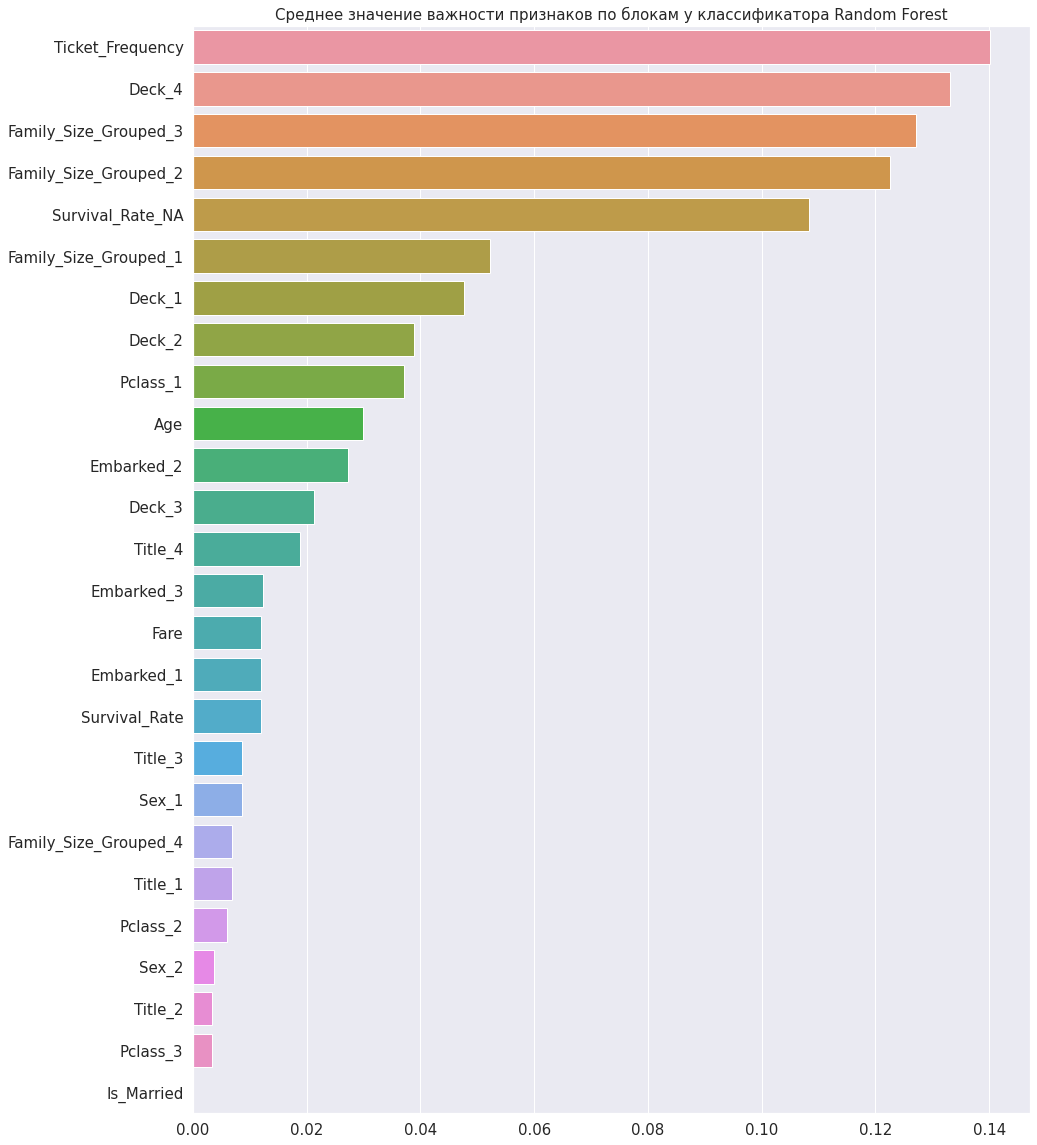

In [317]:
importances['Mean_Importance'] = importances.mean(axis=1)
importances.sort_values(by='Mean_Importance', inplace=True, ascending=False)

plt.figure(figsize=(15, 20))
sns.barplot(x='Mean_Importance', y=importances.index, data=importances)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.title('Среднее значение важности признаков по блокам у классификатора Random Forest', size=15)

plt.show()

Оценка качества модели с помощью метрики ROC AUC

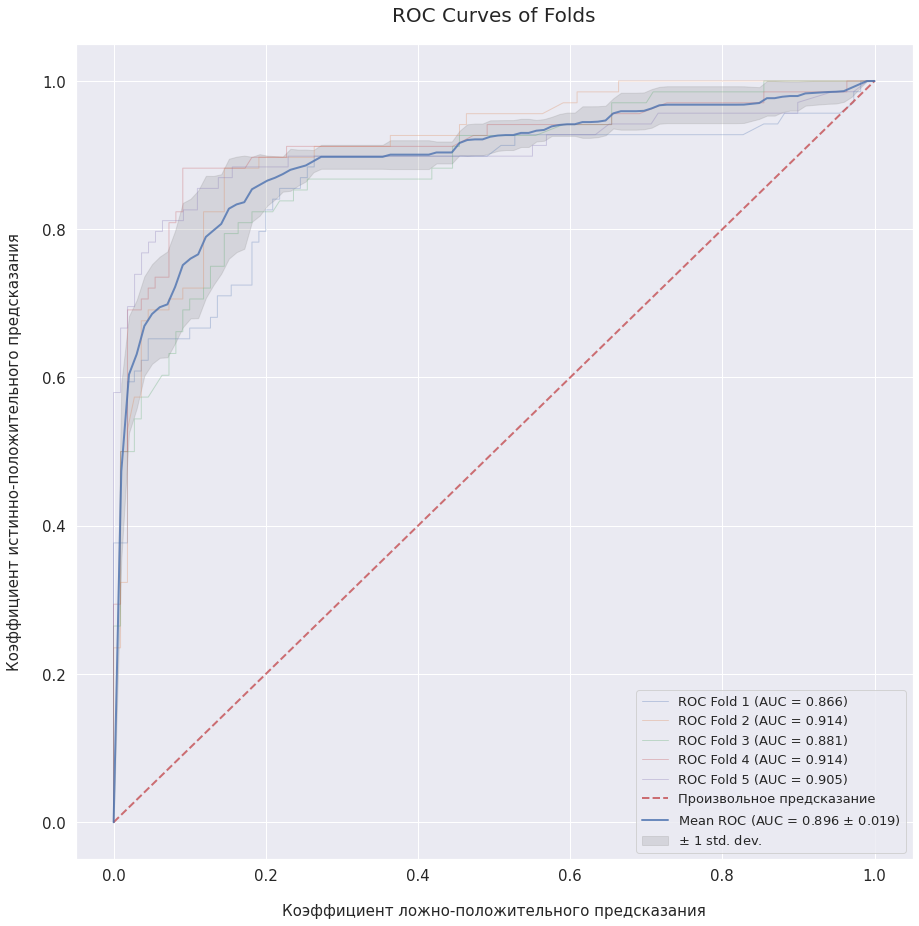

In [319]:
def plot_roc_curve(fprs, tprs):
    
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(15, 15))
    
    # Отрисовка ROC для каждого блока и вычисление значения AUC 
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs), 1):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC Fold {} (AUC = {:.3f})'.format(i, roc_auc))
        
    # Отрисовка ROC для произвольного предсказания
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8, label='Произвольное предсказание')
    
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    # Отрисовка среднего значения ROC
    ax.plot(mean_fpr, mean_tpr, color='b', label='Mean ROC (AUC = {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc), lw=2, alpha=0.8)
    
    # Отрисовка стандартного отклонения для среднего значения ROC кривой
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label='$\pm$ 1 std. dev.')
    
    ax.set_xlabel('Коэффициент ложно-положительного предсказания', size=15, labelpad=20)
    ax.set_ylabel('Коэффициент истинно-положительного предсказания', size=15, labelpad=20)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])

    ax.set_title('ROC Curves of Folds', size=20, y=1.02)
    ax.legend(loc='lower right', prop={'size': 13})
    
    plt.show()

plot_roc_curve(fprs, tprs)

##2.12. Формирование файла для отправки

In [321]:
class_survived = [col for col in probs.columns if col.endswith('Prob_1')]
probs['1'] = probs[class_survived].sum(axis=1) / N
probs['0'] = probs.drop(columns=class_survived).sum(axis=1) / N
probs['pred'] = 0
pos = probs[probs['1'] >= 0.5].index
probs.loc[pos, 'pred'] = 1

y_pred = probs['pred'].astype(int)

submission_df = pd.DataFrame(columns=['PassengerId', 'Survived'])
submission_df['PassengerId'] = df_test['PassengerId']
submission_df['Survived'] = y_pred.values
submission_df.to_csv('submission(2).csv', header=True, index=False)
submission_df.head(10)

,PassengerId,Survived
891,892,0
892,893,1
893,894,0
894,895,0
895,896,1
896,897,0
897,898,1
898,899,0
899,900,1
900,901,0


#3 вариант(~82%)

##3.1. Импорт недостающих библиотек

In [354]:
# Scalers
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

# Models
from sklearn import svm #support vector Machine
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import metrics #accuracy measure
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

# Cross-validation
from sklearn.model_selection import cross_validate

# GridSearchCV
from sklearn.model_selection import GridSearchCV

#Common Model Algorithms
from sklearn import tree, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#Common Model Helpers
from sklearn import feature_selection
from sklearn import model_selection

#Visualization
import matplotlib as mpl
import matplotlib.pylab as pylab
from pandas.plotting import scatter_matrix

##3.2. Считывание данных

In [355]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
data_df = train_df.append(test_df) # The entire data: train + test.

###3.3. Очистка данных

In [356]:
data_df['Title'] = data_df['Name']
# Очистка ФИО и извлечение Роли
for name_string in data_df['Name']:
    data_df['Title'] = data_df['Name'].str.extract('([A-Za-z]+)\.', expand=True)

# Замена редких ролей с наиболее похожими значениями
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
data_df.replace({'Title': mapping}, inplace=True)
titles = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rev']
for title in titles:
    age_to_impute = data_df.groupby('Title')['Age'].median()[titles.index(title)]
    data_df.loc[(data_df['Age'].isnull()) & (data_df['Title'] == title), 'Age'] = age_to_impute
    
# Разделение колонки с возрастом на обучающую(TRAIN_DF) и тестовую(TEST_DF) выборки
train_df['Age'] = data_df['Age'][:891]
test_df['Age'] = data_df['Age'][891:]

# Удаление столбца с ролями
data_df.drop('Title', axis = 1, inplace = True)

Добавление столбца с размером семьи

In [360]:
data_df['Family_Size'] = data_df['Parch'] + data_df['SibSp']

# Разделение колонки на обучающую и тестовую выборки
train_df['Family_Size'] = data_df['Family_Size'][:891]
test_df['Family_Size'] = data_df['Family_Size'][891:]

Добавление столбца с выживаемостью семьи/знакомых

In [362]:
data_df['Last_Name'] = data_df['Name'].apply(lambda x: str.split(x, ",")[0])
data_df['Fare'].fillna(data_df['Fare'].mean(), inplace=True)

DEFAULT_SURVIVAL_VALUE = 0.5
data_df['Family_Survival'] = DEFAULT_SURVIVAL_VALUE

for grp, grp_df in data_df[['Survived','Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId',
                           'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Last_Name', 'Fare']):
    
    if (len(grp_df) != 1): # определена группа как "семья"
        for ind, row in grp_df.iterrows():
            smax = grp_df.drop(ind)['Survived'].max()
            smin = grp_df.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if (smax == 1.0):
                data_df.loc[data_df['PassengerId'] == passID, 'Family_Survival'] = 1
            elif (smin==0.0):
                data_df.loc[data_df['PassengerId'] == passID, 'Family_Survival'] = 0

print("Количество пассажиров с информацией о выживаних/нет из семьи:", 
      data_df.loc[data_df['Family_Survival']!=0.5].shape[0])

Количество пассажиров с информацией о выживаних/нет из семьи: 420


In [364]:
for _, grp_df in data_df.groupby('Ticket'):
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            if (row['Family_Survival'] == 0) | (row['Family_Survival']== 0.5):
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                if (smax == 1.0):
                    data_df.loc[data_df['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (smin==0.0):
                    data_df.loc[data_df['PassengerId'] == passID, 'Family_Survival'] = 0
                        
print("Количество пассажиров с информацией о членах семьи/знакомых " 
      +str(data_df[data_df['Family_Survival']!=0.5].shape[0]))

# Разделение столбца на обучающую и тестовые выборки
train_df['Family_Survival'] = data_df['Family_Survival'][:891]
test_df['Family_Survival'] = data_df['Family_Survival'][891:]

Количество пассажиров с информацией о членах семьи/знакомых 546


In [365]:
data_df['Fare'].fillna(data_df['Fare'].median(), inplace = True)

# Разделение на блоки по стоимости
data_df['FareBin'] = pd.qcut(data_df['Fare'], 5)

label = LabelEncoder()
data_df['FareBin_Code'] = label.fit_transform(data_df['FareBin'])

train_df['FareBin_Code'] = data_df['FareBin_Code'][:891]
test_df['FareBin_Code'] = data_df['FareBin_Code'][891:]

train_df.drop(['Fare'], 1, inplace=True)
test_df.drop(['Fare'], 1, inplace=True)

In [366]:
# Разделение на блоки по возрасту
data_df['AgeBin'] = pd.qcut(data_df['Age'], 4)

label = LabelEncoder()
data_df['AgeBin_Code'] = label.fit_transform(data_df['AgeBin'])

train_df['AgeBin_Code'] = data_df['AgeBin_Code'][:891]
test_df['AgeBin_Code'] = data_df['AgeBin_Code'][891:]

train_df.drop(['Age'], 1, inplace=True)
test_df.drop(['Age'], 1, inplace=True)

In [367]:
# Замена пола на 0, 1
train_df['Sex'].replace(['male','female'],[0,1],inplace=True)
test_df['Sex'].replace(['male','female'],[0,1],inplace=True)

train_df.drop(['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin',
               'Embarked'], axis = 1, inplace = True)
test_df.drop(['Name','PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin',
              'Embarked'], axis = 1, inplace = True)

In [368]:
train_df.head(3)

,Survived,Pclass,Sex,Family_Size,Family_Survival,FareBin_Code,AgeBin_Code
0,0,3,0,1,0.5,0,0
1,1,1,1,1,0.5,4,3
2,1,3,1,0,0.5,1,1


##3.4. Обучение модели

In [412]:
X = train_df.drop('Survived', 1)
y = train_df['Survived']
X_test = test_df.copy()

In [413]:
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)
X_test = std_scaler.transform(X_test)

In [414]:
n_neighbors = [6,7,8,9,10,11,12,14,16,18,20,22]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = list(range(1,50,5))
hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors}
# поиск параметров
gd=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, verbose=True, 
                cv=10, scoring = "roc_auc")
gd.fit(X, y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
0.8790514387573211
KNeighborsClassifier(leaf_size=16, n_neighbors=18)


In [417]:
gd.best_estimator_.fit(X, y)
y_pred = gd.best_estimator_.predict(X_test)

In [421]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski', 
                           metric_params=None, n_jobs=1, n_neighbors=6, p=2, 
                           weights='uniform') # перебирая различные значения leaf_size и n_neighbors удалось достичь score = 0.818 
knn.fit(X, y)
y_pred = knn.predict(X_test)

In [422]:
temp = pd.DataFrame(pd.read_csv("test.csv")['PassengerId'])
temp['Survived'] = y_pred
temp.to_csv("submission.csv", index = False)